# AirBnB & Zillow Data Challenge

### Prathik Ullur  

> Challenge : You are consulting for a real estate company that has a niche in purchasing properties to rent out short-term as part of their business model specifically within New York City.  The real estate company has already concluded that two bedroom properties are the most profitable; however, they do not know which zip codes are the best to invest in.    

> The real estate company has engaged your firm to build out a data product and provide your conclusions to help them understand which zip codes would generate the most profit on short term rentals within New York City.


In [296]:
import pandas as pd
import math
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [16, 9]
plt.rcParams["axes.labelsize"] = 15
import seaborn as sns

## Data Available

### Airbnb

In [259]:
airbnb_df=pd.read_csv('listings.csv')
airbnb_df.describe(include='all')

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
count,4.889500e+04,48895,4.889500e+04,48895,48879,46854,34869,48114,48895,31389,...,48895,48895,48895,48895,48895,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000
unique,NaN,48895,NaN,2,47905,43805,32170,46248,1,26902,...,2,1,6,2,2,NaN,NaN,NaN,NaN,NaN
top,NaN,https://www.airbnb.com/rooms/18719129,NaN,2019-07-08,Hillside Hotel,"Featured in The New York Times, The Wall Stree...",- In-suite laundry - Fully-equipped kitchen Bu...,"Featured in The New York Times, The Wall Stree...",none,FiDi highlights - Walkability score - 98 - 5 m...,...,f,f,strict_14_with_grace_period,f,f,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,36566,18,181,159,147,48895,147,...,30697,48895,22198,47795,47686,NaN,NaN,NaN,NaN,NaN
mean,1.901714e+07,NaN,2.019071e+13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,7.143982,5.559546,1.473811,0.110625,1.373221
std,1.098311e+07,NaN,5.449274e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,32.952519,32.149232,5.600618,0.986685,1.680442
min,2.539000e+03,NaN,2.019071e+13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.000000,0.000000,0.000000,0.000000,0.010000
25%,9.471945e+06,NaN,2.019071e+13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.000000,0.000000,0.000000,0.000000,0.190000
50%,1.967728e+07,NaN,2.019071e+13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,1.000000,0.000000,0.720000
75%,2.915218e+07,NaN,2.019071e+13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2.000000,1.000000,1.000000,0.000000,2.020000



#### AirBnB is the medium through which the investor plans to lease out their investment property. It consists of 106 features and 48895 entries of various properties listed in cities across the US. Some features include price, neighbourhood, zipcode, number of bathrooms, number of bedrooms, number of beds, room-type, square_feet

### Zillow

In [483]:
zillow_df=pd.read_csv('Zip_Zhvi_2bedroom.csv')
zillow_df.describe(include='all')

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2016-09,2016-10,2016-11,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06
count,8946.000000,8946.000000,8946,8946,8696,8946,8946.000000,6284.000000,6364.000000,6364.000000,...,8.946000e+03,8.946000e+03,8.946000e+03,8.943000e+03,8.946000e+03,8.946000e+03,8.946000e+03,8.946000e+03,8.946000e+03,8.946000e+03
unique,NaN,NaN,4684,48,466,722,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Los Angeles,CA,Los Angeles-Long Beach-Anaheim,Los Angeles,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,93,1016,328,254,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,80671.285938,47494.449027,NaN,NaN,NaN,NaN,4473.500000,93754.057925,93616.043369,93642.630421,...,2.057233e+05,2.071612e+05,2.086479e+05,2.099822e+05,2.110339e+05,2.121189e+05,2.132461e+05,2.143624e+05,2.155610e+05,2.165161e+05
std,31636.286116,30868.419487,NaN,NaN,NaN,NaN,2582.632088,44385.146499,44222.734487,44225.112290,...,1.952097e+05,1.960432e+05,1.970957e+05,1.981392e+05,1.988496e+05,1.995264e+05,2.004473e+05,2.017663e+05,2.031817e+05,2.041795e+05
min,58196.000000,1001.000000,NaN,NaN,NaN,NaN,1.000000,22400.000000,23500.000000,24500.000000,...,2.890000e+04,2.880000e+04,2.820000e+04,2.810000e+04,2.830000e+04,2.810000e+04,2.830000e+04,2.870000e+04,2.830000e+04,2.800000e+04
25%,66819.250000,21125.500000,NaN,NaN,NaN,NaN,2237.250000,64100.000000,64000.000000,64000.000000,...,9.870000e+04,9.942500e+04,9.992500e+04,1.007500e+05,1.014000e+05,1.023000e+05,1.029000e+05,1.036250e+05,1.046000e+05,1.053000e+05
50%,77191.500000,44404.000000,NaN,NaN,NaN,NaN,4473.500000,84500.000000,84500.000000,84600.000000,...,1.492000e+05,1.503000e+05,1.514500e+05,1.525000e+05,1.533000e+05,1.542000e+05,1.549000e+05,1.556000e+05,1.565000e+05,1.571000e+05
75%,92251.250000,77357.750000,NaN,NaN,NaN,NaN,6709.750000,111000.000000,110800.000000,111000.000000,...,2.352500e+05,2.373000e+05,2.390000e+05,2.407000e+05,2.422750e+05,2.435000e+05,2.450000e+05,2.460750e+05,2.474000e+05,2.486750e+05


#### Zillow provides us an estimate value for two-bedroom properties since 1996 to 2017 for cities across the US with a total of 8946 entries and 262 columns.

## Data Cleaning/Quality Check

### Airbnb

>### 1. Obtain listings present in New York city. 

We have filtered cities using feature 'market' since the feature 'city' had NYC suburbs listed in as shown below.

In [87]:
airbnb_df['city'].value_counts().to_frame().T

,New York,Brooklyn,Queens,Bronx,Brooklyn,Staten Island,The Bronx,Astoria,Long Island City,New York,...,Auburndale,Queens Astoria,"Flushing ,East Elmhurst","Rosedale, Jamaica",New York East Elmhurst,elmhurst Queens,Far rockaway,PRINCE,"Carroll Gardens,Brooklyn, NYC",Parkchester
city,21934,18978,4328,773,694,346,213,146,81,81,...,1,1,1,1,1,1,1,1,1,1


In [88]:
airbnb_df['market'].value_counts().to_frame().T

,New York,Other (Domestic),Adirondacks,San Francisco,Cuba,Agra,Boston,New Orleans,Jamaica South Coast,Catskills and Hudson Valley,Atlanta,Los Angeles,Kyoto,London,"Lagos, NG",D.C.,Paris
market,48755,15,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [89]:
# Using market to filter cities. Obtain listings in New York. 
nyc_df=airbnb_df[airbnb_df.market =='New York']

> ### 2. Extracting features related to location, price and reviews for our assessment.

In [90]:
# Extract location, price and review features
col=['id','street','neighbourhood','neighbourhood_cleansed','neighbourhood_group_cleansed','city','state','zipcode','market','smart_location','latitude','longitude','is_location_exact','property_type','room_type','accommodates','bathrooms','bedrooms','beds','bed_type','square_feet','price','monthly_price','security_deposit','number_of_reviews','first_review','last_review','review_scores_rating','review_scores_accuracy','review_scores_cleanliness','review_scores_checkin','review_scores_communication','review_scores_location','review_scores_value']
nyc_df=nyc_df[col]

>### 3. Check columns for null values

In [91]:
#Find percentage of columns with null values
(nyc_df.isnull().sum()/len(nyc_df)*100).to_frame().sort_values(by=0,ascending=False)[:20].T

,square_feet,monthly_price,security_deposit,review_scores_location,review_scores_value,review_scores_checkin,review_scores_accuracy,review_scores_communication,review_scores_cleanliness,review_scores_rating,last_review,first_review,zipcode,city,bathrooms,beds,bedrooms,neighbourhood,state,street
0,99.163163,89.240078,35.422008,22.662291,22.658189,22.654087,22.617167,22.606912,22.582299,22.539227,20.559943,20.559943,1.060404,0.127166,0.11486,0.082043,0.045124,0.024613,0.012306,0.0


From our analysis, we see that square_feet, monthly_price features have more 90% of rows having missing values. 

There are also 20-25% missing values among the review columns.

We shall ignore handling these missing values since the amount of missing data is large. 

Zipcode has 1% missing values while bathrooms,beds and bedrooms have less than 1% missing values. We shall handle these missing values in the next few sections.

>####  i. Imputing null values in zipcode 


There are 517 rows with null values in zipcode. From the above section, we see that the 'neighbourhood_cleaned',  which lists the neighbourhood the propertly belongs to, has 0 null values. 

Hence, we shall replace the null zipcodes with the highest occuring zipcode of its respective neighbourhood_cleaned column value

In [92]:
#### Filling na values as 999
nyc_df['zipcode']=nyc_df['zipcode'].fillna(-999)

Handling zipcodes with extra numbers. Assuming first 5 digits represents zipcode

In [93]:
nyc_df['zipcode']=nyc_df['zipcode'].astype(str).str.slice(start=0, stop=5)

List of neighbourhood and zipcodes belonging to them

In [94]:
neighbourhood_max_zipcode=nyc_df.groupby(['neighbourhood_cleansed','zipcode'])['zipcode'].agg({'total_count':'count'}).reset_index()
neighbourhood_max_zipcode.T

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
neighbourhood_cleansed,Allerton,Allerton,Allerton,Arden Heights,Arrochar,Arverne,Astoria,Astoria,Astoria,Astoria,...,Woodhaven,Woodhaven,Woodlawn,Woodlawn,Woodlawn,Woodlawn,Woodrow,Woodside,Woodside,Woodside
zipcode,10462,10467,10469,10312,10305,11692,-999,11101,11102,11103,...,11417,11421,10466,10467,10470,10704,10312,-999,11373,11377
total_count,1,17,24,4,21,77,13,17,251,390,...,1,85,2,1,7,1,1,2,3,229


Maximum occuring zipcode for each neighbourhood

In [95]:
neighbourhood_zipcode_df=neighbourhood_max_zipcode.groupby('neighbourhood_cleansed').apply(lambda x: x.zipcode[x.total_count.idxmax()]).to_frame().reset_index()
neighbourhood_zipcode_df.columns=['neighbourhood_cleansed','zipcode']
neighbourhood_zipcode_df.T

,0,1,2,3,4,5,6,7,8,9,...,211,212,213,214,215,216,217,218,219,220
neighbourhood_cleansed,Allerton,Arden Heights,Arrochar,Arverne,Astoria,Bath Beach,Battery Park City,Bay Ridge,Bay Terrace,"Bay Terrace, Staten Island",...,Westerleigh,Whitestone,Williamsbridge,Williamsburg,Willowbrook,Windsor Terrace,Woodhaven,Woodlawn,Woodrow,Woodside
zipcode,10469,10312,10305,11692,11103,11214,10280,11209,11360,10308,...,-999,11357,10467,11211,10314,11218,11421,10470,10312,11377


In [96]:
def transform_null_zipcodes(each_row):
    
    if each_row['zipcode']=='-999':
        each_row['zipcode']=neighbourhood_zipcode_df[neighbourhood_zipcode_df['neighbourhood_cleansed']==each_row['neighbourhood_cleansed']].zipcode.item()
        return each_row
    else:
        return each_row

#Replace -999 zipcode with neighbourhood with maximum zipcode    
nyc_df=nyc_df.apply(transform_null_zipcodes, axis=1)

>###### ii. Imputing null value in beds, bathrooms and bedrooms columns

 List of bedrooms and highest occuring beds

In [97]:
bedroom_df=nyc_df.groupby(['bedrooms','beds'])['beds'].agg({'total_count':'count'}).reset_index()
bedroom_df=bedroom_df.groupby('bedrooms').apply(lambda x: x.beds[x.total_count.idxmax()]).to_frame().reset_index()
bedroom_df.columns=['bedrooms','beds']
bedroom_df.T

,0,1,2,3,4,5,6,7,8,9,10,11,12
bedrooms,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,14.0
beds,1.0,1.0,2.0,3.0,4.0,5.0,6.0,8.0,8.0,9.0,13.0,21.0,40.0


From the above table we see that most of the bedrooms are equal to the number of beds and vice versa

#### Replacing null values in bedrooms and bathrooms with corresponding values listed in the above table

In [98]:
def transform_null_bedrooms(each_row): 
    
    if math.isnan(each_row['beds']):
        each_row['beds']=each_row['bedrooms']
        return each_row
    elif math.isnan(each_row['bedrooms']):
        each_row['bedrooms']=each_row['beds']
        return each_row
    else:
        return each_row
    
nyc_df=nyc_df.apply(transform_null_bedrooms, axis=1)

List of bedrooms and highest occuring bathrooms

In [99]:
bathrooms_df=nyc_df.groupby(['bedrooms','bathrooms'])['bathrooms'].agg({'total_count':'count'}).reset_index()
bathrooms_df=bathrooms_df.groupby('bedrooms').apply(lambda x: x.bathrooms[x.total_count.idxmax()]).to_frame().reset_index()
bathrooms_df.columns=['bedrooms','bathrooms']
bathrooms_df.T

,0,1,2,3,4,5,6,7,8,9,10,11,12
bedrooms,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,14.0
bathrooms,1.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,4.0,3.0,6.0,2.0,15.5


#### Replacing null values in bathrooms with corresponding values listed in the above table

In [100]:
def transform_null_bathrooms(each_row):
    
    if  math.isnan(each_row['bathrooms']):    
        #checking if bedrooms are null
        if math.isnan(each_row['bedrooms'])==False:
            each_row['bathrooms']=bathrooms_df[bathrooms_df['bedrooms']==each_row['bedrooms']].bathrooms.item()
        return each_row
    else:
        return each_row
    
nyc_df=nyc_df.apply(transform_null_bathrooms, axis=1)

>#### 4. Removing '$' sign in Price column and converting to numerical  

In [128]:
nyc_df['price']=nyc_df['price'].replace('[\$,]', '', regex=True).astype(float)

Export New York Airbnb data to CSV file

In [ ]:
nyc_df.to_csv('nyc_df.csv', index=False)

### Zillow

>#### Check columns for null values

In [113]:
#Find percentage of columns with null values
(zillow_df.isnull().sum()/len(nyc_df)*100).to_frame().sort_values(by=0,ascending=False).T

,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,1996-11,1996-12,1997-01,...,2014-05,2014-06,2014-07,2014-08,2014-09,2014-10,2014-11,2014-12,2015-01,2017-06
0,5.459953,5.295867,5.295867,5.285612,5.283561,5.283561,5.283561,5.26305,5.26305,5.213824,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


From the above table, we see that most of the null values lie in the first few years. This gradually decreases with each passing year

## Data Munging



>#### Find list of zipcodes common in both Airbnb and Zillow

Obtain zipcodes present in airbnb New York data 

In [484]:
nyc_df=pd.read_csv('nyc_df.csv')
nyc_df.zipcode=nyc_df.zipcode.astype(int)
zillow_df['RegionName']=zillow_df['RegionName'].astype(int)

In [485]:
list_zipcode=[]
for airbnb_zipcode in nyc_df.zipcode.unique():
    if airbnb_zipcode in zillow_df['RegionName'].unique():
        list_zipcode.append(airbnb_zipcode)

Extract zipcodes in zillow data that are present in airbnb nyc data

In [486]:
def region_present(each_row):
    if each_row['RegionName'] in list_zipcode:
        return each_row

zillow_unique_df=zillow_df.apply(region_present, axis=1)
zillow_unique_df=zillow_unique_df.dropna(subset=['RegionName'])
zillow_unique_df.RegionName=zillow_unique_df.RegionName.astype(int)
zillow_unique_df.RegionName=zillow_unique_df.RegionName.dropna()

Export New York Zillow data to CSV file

In [487]:
zillow_unique_df.to_csv('zillow_nyc.csv',index=False)

>#### Obtain median cost for each zipcode in each year

Dataframe lists the median cost of a two bedroom property in each year for each zipcode

In [488]:
zillow_unique_df.index = zillow_unique_df.RegionName
zillow_unique_df=zillow_unique_df.dropna(subset=['RegionName'])
zillow_df_T=zillow_unique_df.T

#extract date information 
zillow_df_T=zillow_df_T[7:]
zillow_df_T=zillow_df_T.reset_index()

zillow_df_T.rename(columns = {'index':'date','RegionName':'id'}, inplace = True)
zillow_df_T.date=pd.to_datetime(zillow_df_T.date)

#add new column date_year which says only date
zillow_df_T['date_year']=zillow_df_T.date.dt.year

zillow_df_T=zillow_df_T[zillow_df_T['date_year']>2008]
zillow_df_T=zillow_df_T.iloc[:, 1: ].astype(int)
zillow_df_T=zillow_df_T.groupby(['date_year']).median().reset_index()
zillow_df_T

RegionName,date_year,10025,10023,10128,10011,10003,11201,11234,10314,11215,...,11231,10304,10705,10305,10704,11003,10309,10308,94085,10303
0,2009,854500,1374950,987550,1508800,1396050,696300,370600,286550,516850,...,572650,272350,352500,328350,355750,280650,311800,317600,410600,261350
1,2010,859050,1344550,1009050,1446300,1278700,765950,390600,287100,545700,...,597400,260750,330500,321300,348050,277400,313900,324750,405550,258250
2,2011,898600,1379700,982150,1435900,1363050,796650,375050,275200,605250,...,649250,248150,332450,305150,332500,267050,302150,317550,392250,243750
3,2012,915050,1380450,1056000,1542250,1370400,838000,366950,268600,618500,...,669900,233250,303050,300250,310800,259400,298750,309700,400850,232000
4,2013,1045000,1496400,1168400,1798350,1533100,923350,374350,274300,715350,...,765900,237400,310850,301850,311200,262550,308650,315250,517150,232000
5,2014,1141150,1729600,1225850,2029500,1735500,1148900,393250,283200,861200,...,951250,238550,321850,314850,326900,279850,317100,319700,580600,242200
6,2015,1224700,1724050,1362000,2066800,1809000,1299950,416750,292050,945150,...,1013650,261650,325950,320350,336450,296900,327200,323850,673450,256450
7,2016,1361250,1913000,1525650,2268000,1935350,1336750,439400,316500,975350,...,1115050,276100,340600,361250,349700,315400,344450,348200,778800,278250
8,2017,1342900,1988700,1622500,2354000,2005500,1400200,473300,345950,1045400,...,1202550,311050,382250,407900,386000,345700,374150,392100,782650,312450


Export New York Zillow data with year to CSV file

In [489]:
zillow_df_T.to_csv('Year_Zillow_Data.csv',index=False)

>#### Add column median cost in Airbnb dataframe for each listing

In [ ]:
zillow_df_2017=zillow_df[8:].T.reset_index().rename({ 'index':'zipcode',8:'median_cost'},axis=1)[1:]

def get_median_price(each_row):
    zipcode=int(each_row)
    return(zillow_df_2017[zillow_df_2017.zipcode==str(zipcode)]['median_cost'].item())
     
airbnb_unique_df['median_cost']=airbnb_unique_df.zipcode.apply(get_median_price)

Export Airbnb data with median cost to CSV file

In [490]:
airbnb_unique_df.to_csv('Airbnb_Median_Cost.csv',index=False)

## Exploratory Data Analysis 

> ### 1. Popular neighbourhood groups based on number and density of listings

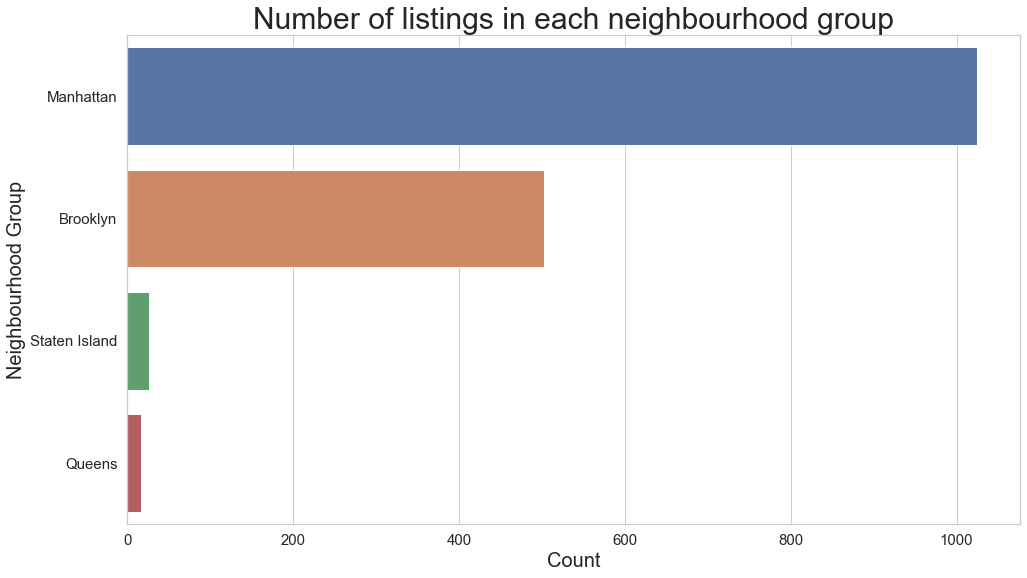

In [424]:
sns.set(style="whitegrid")
df=airbnb_unique_df.neighbourhood_group_cleansed.value_counts(ascending=False).to_frame().reset_index()
ax = sns.barplot(x="neighbourhood_group_cleansed", y="index", data=df)

plt.xlabel('Count', fontsize=20)
plt.ylabel('Neighbourhood Group', fontsize=20)

ax.axes.set_title("Number of listings in each neighbourhood group",fontsize=30)

for tick in ax.axes.xaxis.get_major_ticks():
    tick.label.set_fontsize(15)

for tick in ax.axes.yaxis.get_major_ticks():
    tick.label.set_fontsize(15)

### We see that Manhattan and Brookyln neighbourhood groups have the highest number of two bedroom listings while Queens and Staten Island have relatively lesser number of listings. The higher number of listings can be explained by higher popularity or larger size of the neighbourhood group. Let us determine this in the next section.

> ### Relative density of neighbourhood groups by dividing the number of listings by number of zipcodes in respective neighbourhood group

In [376]:
zipcodes_each_neigh=airbnb_unique_df.groupby(['neighbourhood_group_cleansed','zipcode'])['zipcode'].count().to_frame()
zipcodes_each_neigh=zipcodes_each_neigh.groupby('neighbourhood_group_cleansed').count().reset_index()
zipcodes_each_neigh.columns = ['neighbourhood_group_cleansed','value']
zipcodes_each_neigh=zipcodes_each_neigh.set_index('neighbourhood_group_cleansed')

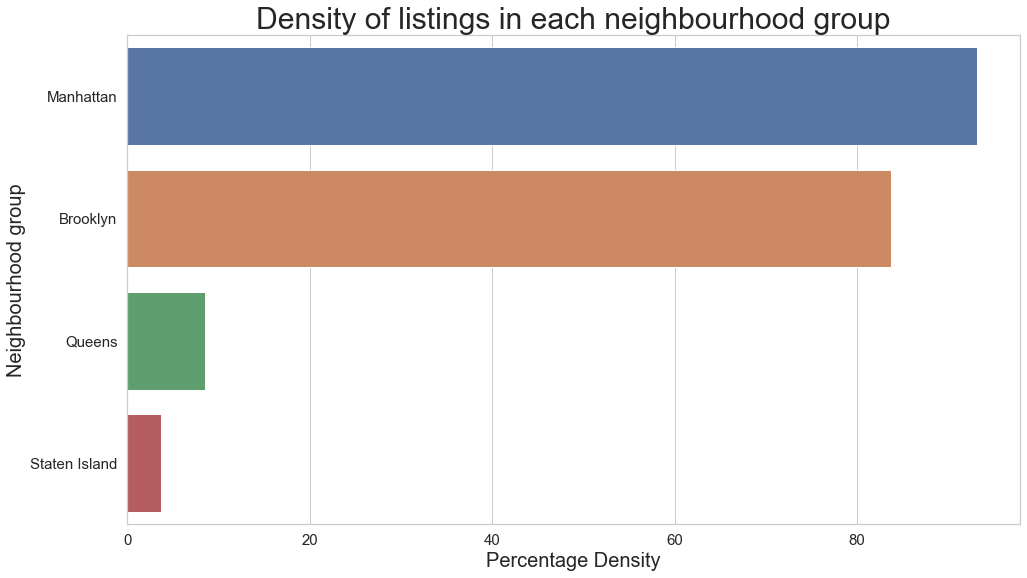

In [426]:
total_listings=airbnb_unique_df.neighbourhood_group_cleansed.value_counts(ascending=False).to_frame().reset_index()
total_listings.columns = ['neighbourhood_group_cleansed','value']
total_listings=total_listings.set_index('neighbourhood_group_cleansed')

df=(total_listings/zipcodes_each_neigh).sort_values(by='value',ascending=False).reset_index()

ax = sns.barplot(x="value", y="neighbourhood_group_cleansed", data=df)

plt.xlabel('Percentage Density', fontsize=20)
plt.ylabel('Neighbourhood group', fontsize=20)

ax.axes.set_title("Density of listings in each neighbourhood group",fontsize=30)

for tick in ax.axes.xaxis.get_major_ticks():
    tick.label.set_fontsize(15)

for tick in ax.axes.yaxis.get_major_ticks():
    tick.label.set_fontsize(15)

### From the above barplot, we see that Manhattan and Brooklyn are highly dense with two-bedroom airbnb properties while Queens and Staten Island have less number of properties in them. 

We can infer that Manhattan and Brookyln must be popular areas to have airbnb properties in because of a high density of listings in each zipcode. This would also mean high competition and high competitive prices for properties in these neighbourhoods. However on the bright side, we can conclude that because of the high number of listings, these properties must be booked quite frequently and are established neighbourhoods.

On the other hand, Queens and Staten Island are less dense. We can assume that these neighbourhoods are unsaturated and have the most potential to establish new properties. However, we cannot determine if these properties are booked frequently from this data and shall have to analyze the data further to obtain this information.

>### 2. Top popular neighbourhoods based on number of listings 

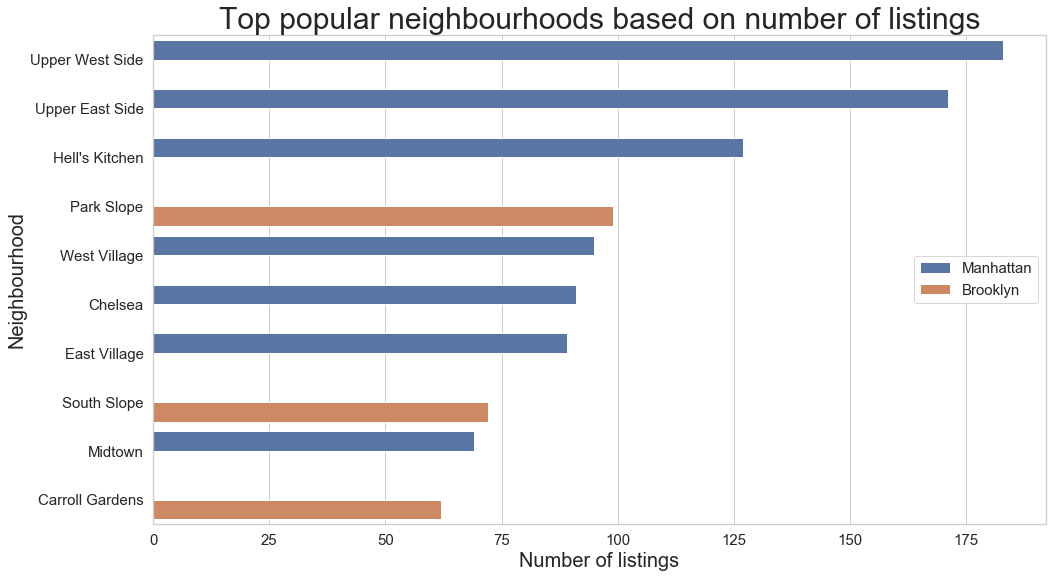

In [427]:
df=airbnb_unique_df.groupby(['neighbourhood_group_cleansed','neighbourhood_cleansed'])['neighbourhood_cleansed'].agg(
    {'count':'count'}).sort_values(by='count',ascending=False).reset_index()[:10].reset_index()

ax = sns.barplot(x="count", y="neighbourhood_cleansed",hue='neighbourhood_group_cleansed', data=df)
ax.axes.set_title("Top popular neighbourhoods based on number of listings",fontsize=30)
plt.xlabel('Number of listings', fontsize=20)
plt.ylabel('Neighbourhood', fontsize=20)

ax.legend(fontsize=15)
for tick in ax.axes.xaxis.get_major_ticks():
    tick.label.set_fontsize(15)

for tick in ax.axes.yaxis.get_major_ticks():
    tick.label.set_fontsize(15)

### Upper West, East side and Hell's Kitchen properties have the highest number of properties which mean they must be really popular. We see most of the popular neighbourhoods belong to Manhattan as indicated in the above plot. Park Slope is the next most popular neighbourhood belonging to Brookyln

>### 3. Variation in price

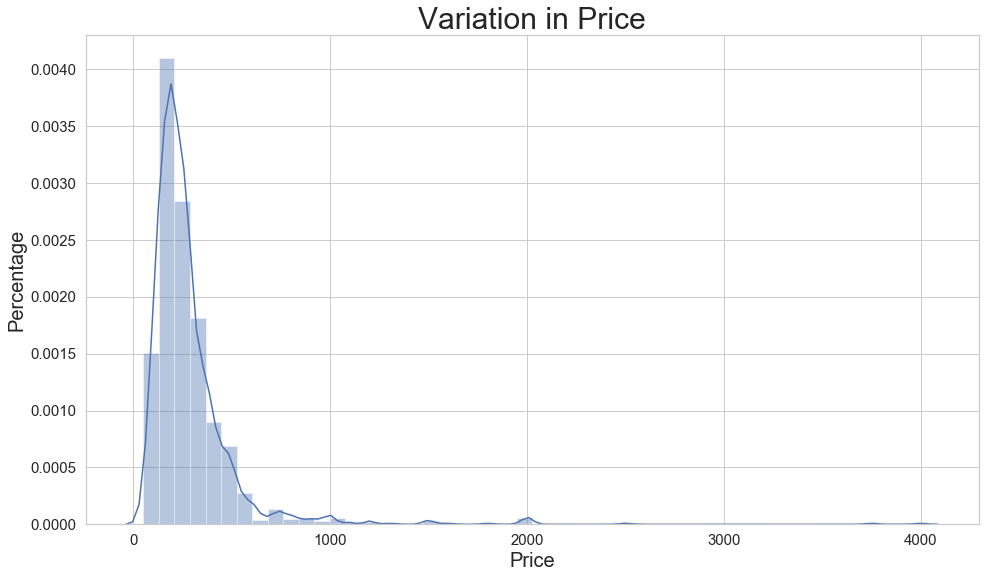

In [439]:
ax = sns.distplot(airbnb_unique_df['price'])
ax.axes.set_title("Variation in Price",fontsize=30)

plt.xlabel('Price', fontsize=20)
plt.ylabel('Percentage', fontsize=20)

for tick in ax.axes.xaxis.get_major_ticks():
    tick.label.set_fontsize(15)

for tick in ax.axes.yaxis.get_major_ticks():
    tick.label.set_fontsize(15)
    

### From the above plot, we can infer that most of the values lie below 600usd and its right-skewed. There are a lot of outliers with the maximum price value being 4000usd. From this plot, we can conclude that we shall need to handle the outliers well since it can skew results by huge margins. 

### We shall be using median instead of mean for further analysis due to presence of large outliers.

> ### 4. Median price for a 2-bedroom property by neighbourhood

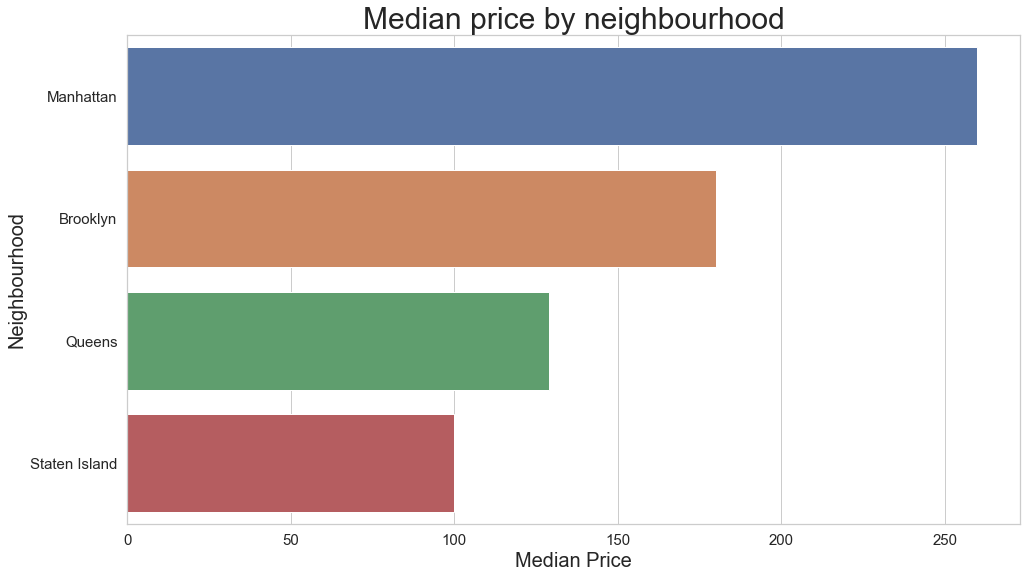

In [436]:
sns.set(style="whitegrid")
df=airbnb_unique_df.groupby('neighbourhood_group_cleansed')['price'].median().sort_values(ascending=False).to_frame().reset_index()
df

ax = sns.barplot(x="price", y="neighbourhood_group_cleansed", data=df)
ax.axes.set_title("Median price by neighbourhood",fontsize=30)
plt.xlabel('Median Price', fontsize=20)
plt.ylabel('Neighbourhood', fontsize=20)

for tick in ax.axes.xaxis.get_major_ticks():
    tick.label.set_fontsize(15)

for tick in ax.axes.yaxis.get_major_ticks():
    tick.label.set_fontsize(15)

### The Median price of Manhattan listings are 260usd per night and Brooklyn listings are 180usd per night. 

We conclude that the higher median price can be associated with higher popularity, higher density of listings and higher bookings. The higher median price could also mean a larger area of the listings attracting higher price which we shall determine in the next section


### The Median price of Queens listings are 125usd per night and Staten Island listings are 100usd per night. 

We conclude that Queens and Staten Island have less popularity and less density of listings. The less median price can also confirm that bookings must not be as frequent since the prices are low to attract more customers.  

>### 5. Median price by room_type

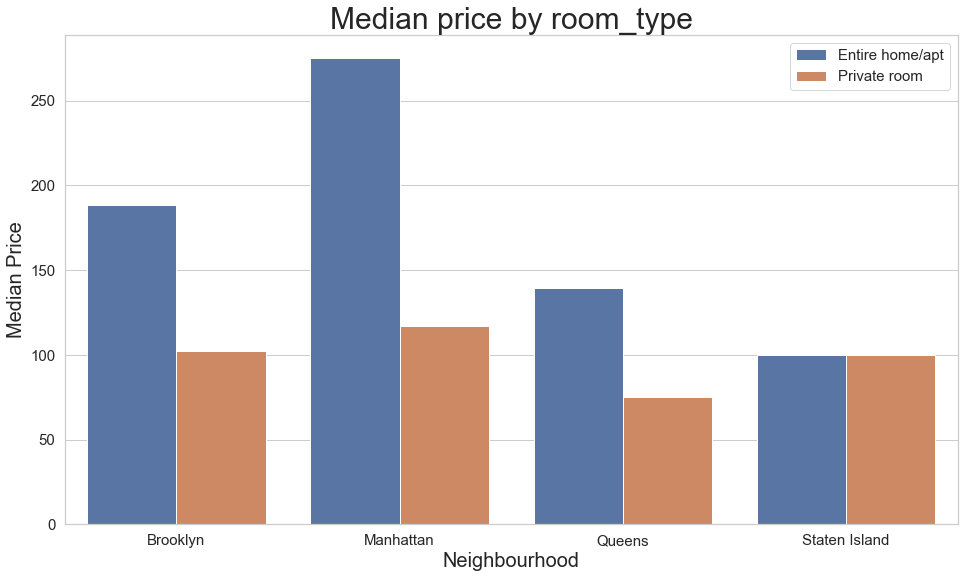

In [433]:
df=airbnb_unique_df.groupby(['neighbourhood_group_cleansed','room_type']).price.agg({'Median_price':'median'}).reset_index()

ax=sns.barplot(x="neighbourhood_group_cleansed", y="Median_price", hue="room_type", data=df)
ax.axes.set_title("Median price by room_type",fontsize=30)
plt.xlabel('Neighbourhood', fontsize=20)
plt.ylabel('Median Price', fontsize=20)

ax.legend(fontsize=15)
for tick in ax.axes.xaxis.get_major_ticks():
    tick.label.set_fontsize(15)

for tick in ax.axes.yaxis.get_major_ticks():
    tick.label.set_fontsize(15)

### We conclude that most of the listings in Manhattan are for entire home/apts which account for the high price. The price is more than 2x as that for private rooms. 

### Brookyln and Queens also have high price for entire home/apts as compared to private rooms. However, this difference is not as large as that of Manhattan listings. 

### Staten Island surprisingly, has the same median price for both entire home/apts and private rooms.

### Private rooms in all four neighbourhood groups have similar price which is surprising given the popularity difference between the neighbourhoods and the distinct difference in median prices for entire home/apts. 




>### 6. Correlation matrix of features and with price

Text(0.5, 1, 'Correlation Matrix')

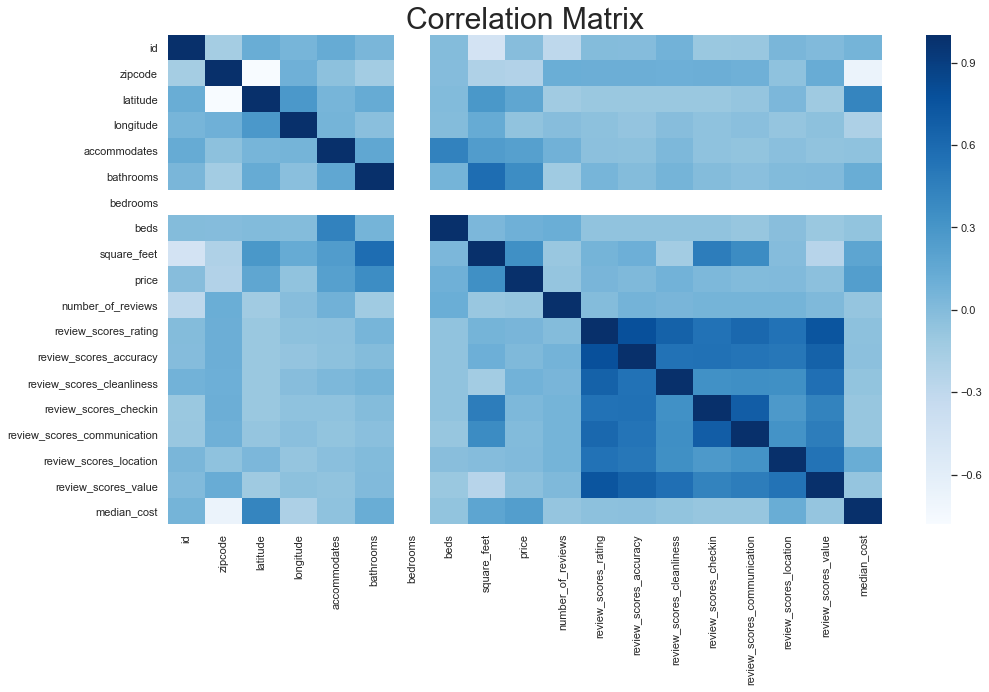

In [302]:
corrMatrix = airbnb_unique_df.corr()
ax = sns.heatmap(corrMatrix, cmap="Blues")
ax.axes.set_title("Correlation Matrix",fontsize=30)

### From the correlation matrix, we see high correlation between the review score features and  bathrooms,bedrooms and beds. Let us find the correlation between price and all the other features to determine how these features affect price

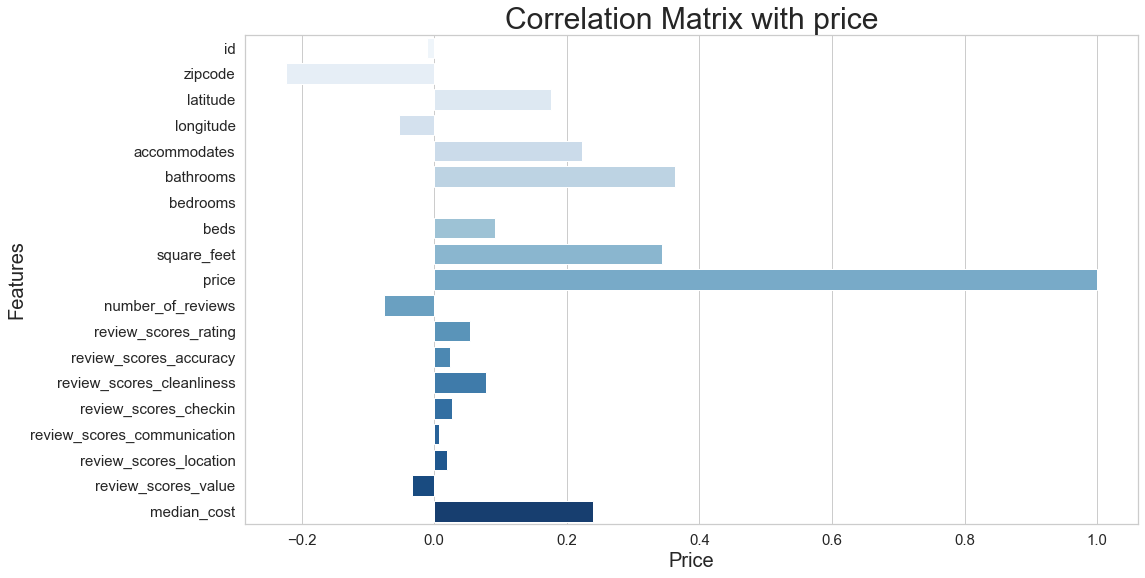

In [443]:
df=corrMatrix['price'].reset_index()
ax = sns.barplot(x="price", y="index",palette='Blues', data=df)
ax.axes.set_title("Correlation Matrix with price",fontsize=30)

plt.xlabel('Price', fontsize=20)
plt.ylabel('Features', fontsize=20)


for tick in ax.axes.xaxis.get_major_ticks():
    tick.label.set_fontsize(15)

for tick in ax.axes.yaxis.get_major_ticks():
    tick.label.set_fontsize(15)

> ### From the above correlation plot, we can conclude the following features increase price for a two bedroom listing in New york City in the order of decreasing magnitude:  

 
>i.  number of bathrooms   
ii.  square_feet    
iii. cost of the property     
iv.  number of people it can accomodate    
v.  latitude   
vi. cleanliness ratings    


### These features will help the real-estate in buying property in New York City. The higher the feature values listed above, the higher the market price of the property will be.

>### 7. Trend of average cost

Text(0.5, 1.0, 'Trend of Average Cost')

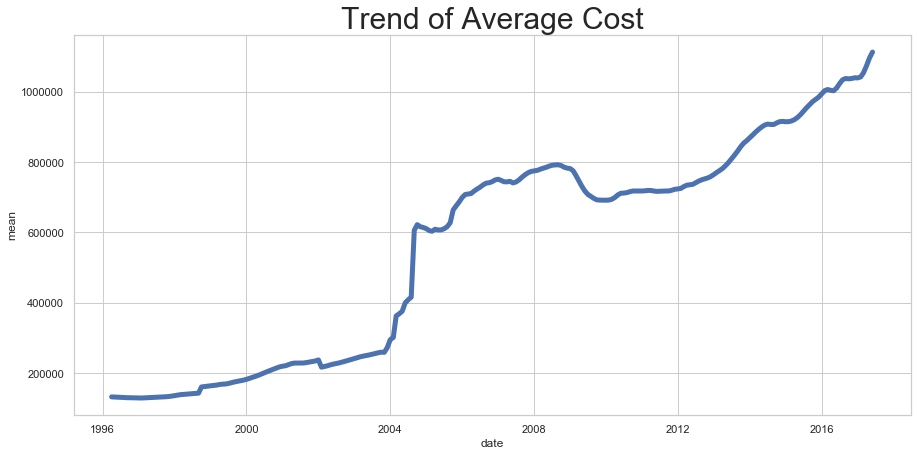

In [149]:
zillow_unique_df.index = zillow_unique_df.RegionName 
zillow_df_mean_cost=zillow_unique_df.T
zillow_df_mean_cost=zillow_df_mean_cost[7:]
zillow_df_mean_cost=zillow_df_mean_cost.mean(axis=1).reset_index()
zillow_df_mean_cost.columns=['date','mean']
zillow_df_mean_cost.date=pd.to_datetime(zillow_df_mean_cost.date)
fig, ax = plt.subplots(figsize=(15,7))
ax = sns.lineplot(x="date", y="mean",  data=zillow_df_mean_cost,linewidth=5,palette=sns.diverging_palette(220, 20, n=1))
plt.title('Trend of Average Cost',fontsize='30')

>### 8. Trend of Median Cost

Text(0.5, 1.0, 'Trend of median cost ')

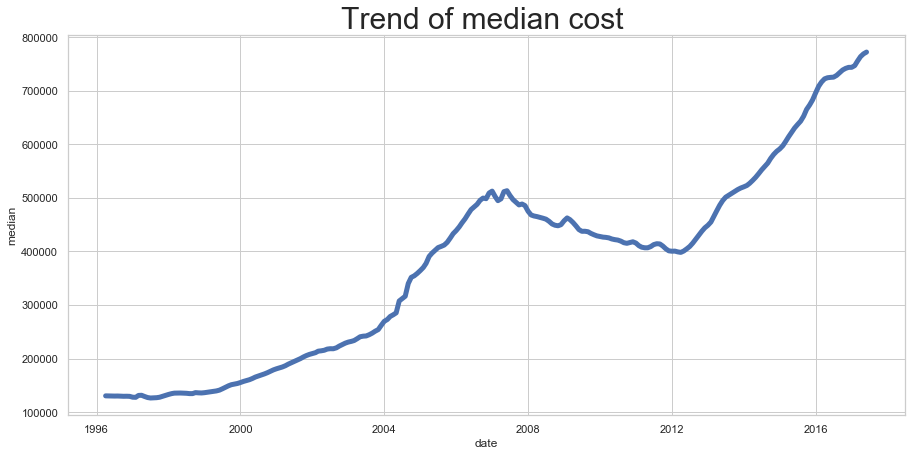

In [150]:
zillow_unique_df.index = zillow_unique_df.RegionName 
zillow_df_median_cost=zillow_unique_df.T
zillow_df_median_cost=zillow_df_median_cost[7:]
zillow_df_median_cost=zillow_df_median_cost.median(axis=1).reset_index()
zillow_df_median_cost.columns=['date','median']
zillow_df_median_cost.date=pd.to_datetime(zillow_df_mean_cost.date)
fig, ax = plt.subplots(figsize=(15,7))
ax = sns.lineplot(x="date", y="median",  data=zillow_df_median_cost,linewidth=5,palette=sns.diverging_palette(220, 20, n=1))
plt.title('Trend of median cost ',fontsize='30')


 ### In both  the average and median cost graphs, we see a decline in cost in 2008 which we can attribute to recession. The median price drops drastically from 2007 which suggests to us that costs of smaller properties declined faster than costs of larger properties since the average price in 2007 is still increasing.
 
 ### We see a drastic increase in costs in 2012 and has been increasing rapidly ever since.

> ### 9. Trend of median cost by Zipcode

Text(0.5, 1.0, 'Trend of median cost by Zipcode')

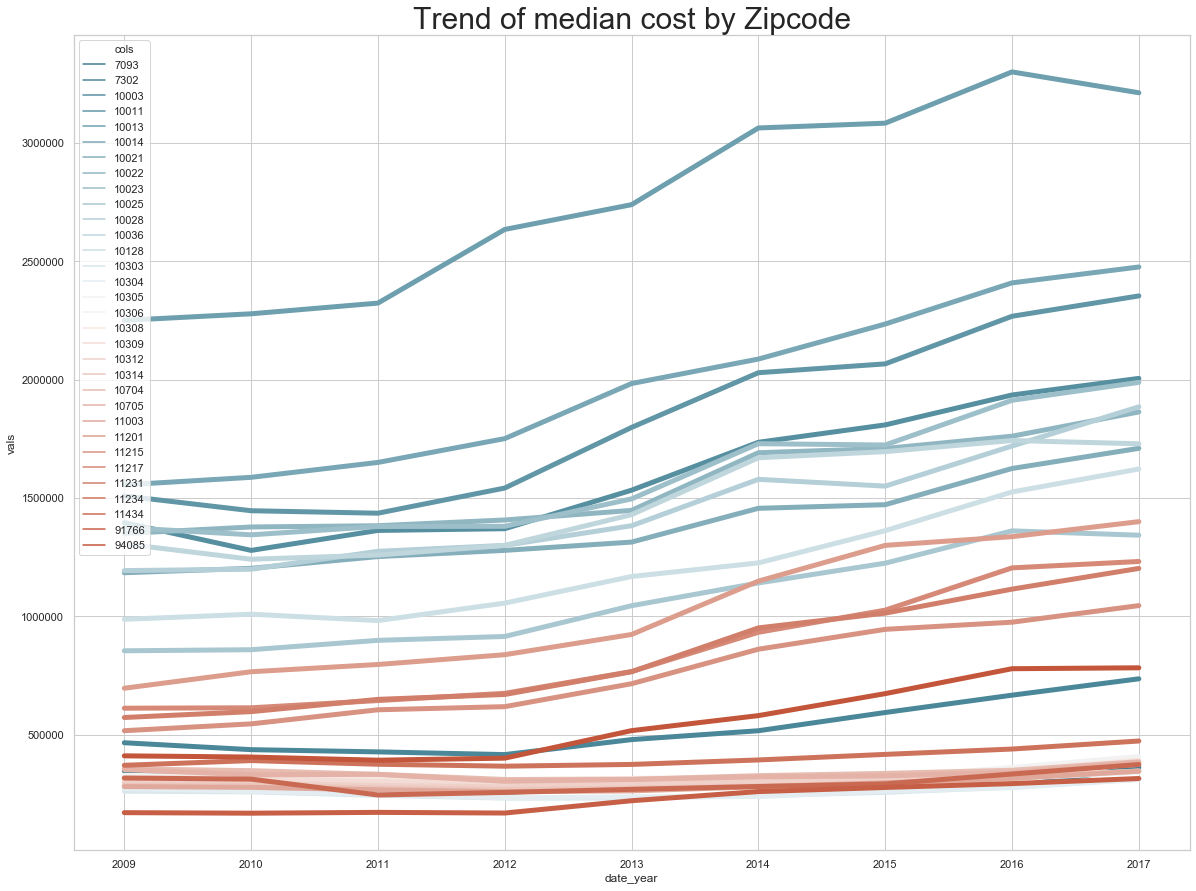

In [152]:
zillow_unique_df.index = zillow_unique_df.RegionName
zillow_unique_df=zillow_unique_df.dropna(subset=['RegionName'])
zillow_df_T=zillow_unique_df.T

#extract date information 
zillow_df_T=zillow_df_T[7:]
zillow_df_T=zillow_df_T.reset_index()

zillow_df_T.rename(columns = {'index':'date','RegionName':'id'}, inplace = True)
zillow_df_T.date=pd.to_datetime(zillow_df_T.date)

#add new column date_year which says only date
zillow_df_T['date_year']=zillow_df_T.date.dt.year

zillow_df_T=zillow_df_T[zillow_df_T['date_year']>2008]
zillow_df_T=zillow_df_T.iloc[:, 1: ].astype(int)
zillow_df_T=zillow_df_T.groupby(['date_year']).median().reset_index()


fig, ax = plt.subplots(figsize=(20,15))
df = zillow_df_T.melt('date_year', var_name='cols',  value_name='vals')

df=df.astype(int)

ax = sns.lineplot(x="date_year", y="vals", hue='cols', data=df,legend='full',linewidth=5,palette=sns.diverging_palette(220, 20, n=32))
plt.title('Trend of median cost by Zipcode',fontsize='30')

### We see the general trend of median costs of zipcodes increasing after 2012 as seen in the previous trend graphs. Some zipcode costs seem to dip in 2016 which we shall investigate further 

>### 10. Highest costing zipcodes in 2017

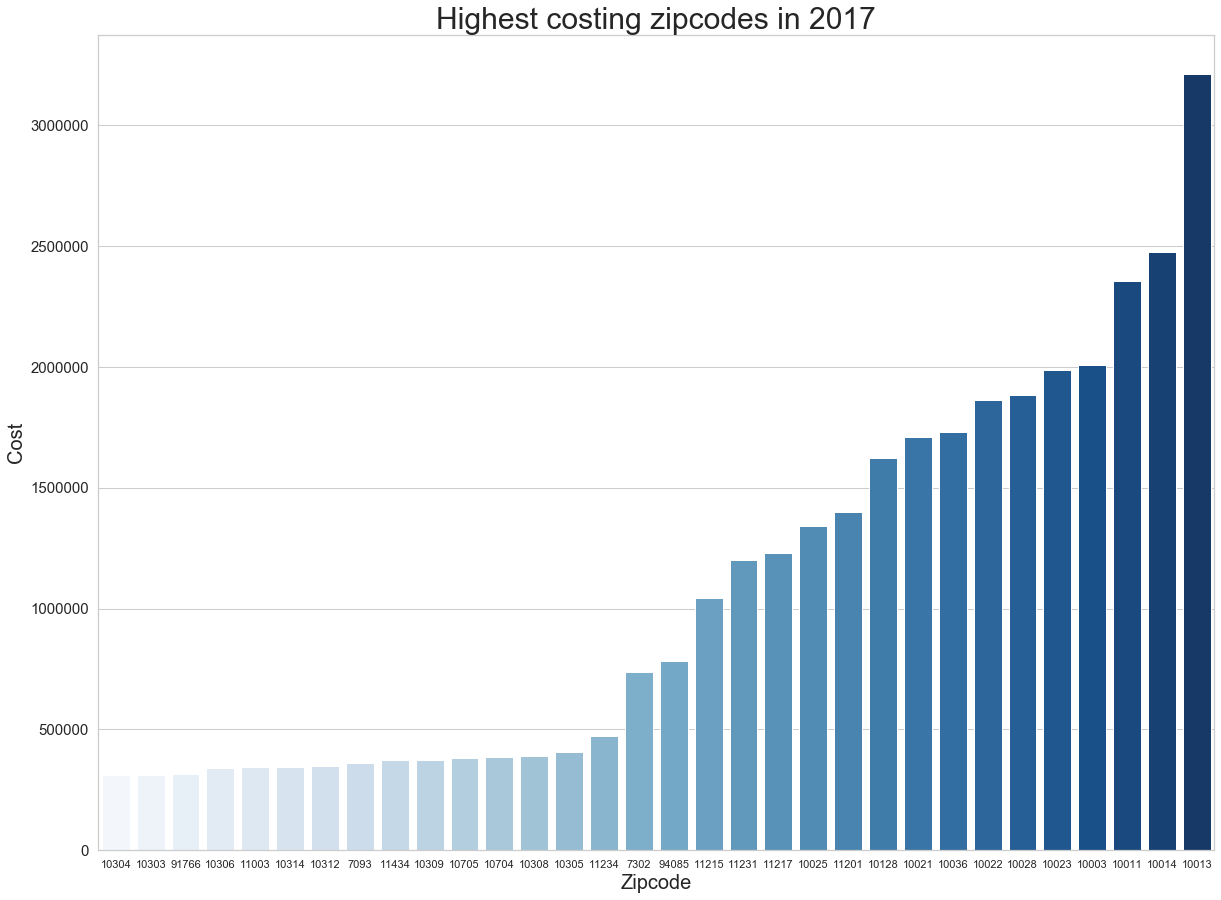

In [184]:
zillow_df_year=zillow_df_T.drop('date_year',axis=1)
fig, ax = plt.subplots(figsize=(20,15))
zillow_df_2017=zillow_df_year[8:]
zillow_df_2017=zillow_df_2017.T
zillow_df_2017=zillow_df_2017.reset_index().rename({ 8: "median_price"},axis=1)
df=zillow_df_2017.sort_values(by='median_price')

ax = sns.barplot(x='RegionName', y='median_price',palette='Blues', data=df,order=df['RegionName'])


plt.title('Highest costing zipcodes in 2017',fontsize='30')
plt.xlabel('Zipcode', fontsize=20)
plt.ylabel('Cost', fontsize=20)



for tick in ax.axes.yaxis.get_major_ticks():
    tick.label.set_fontsize(15)

>### 11. Highest Costing Zipcodes in 2016

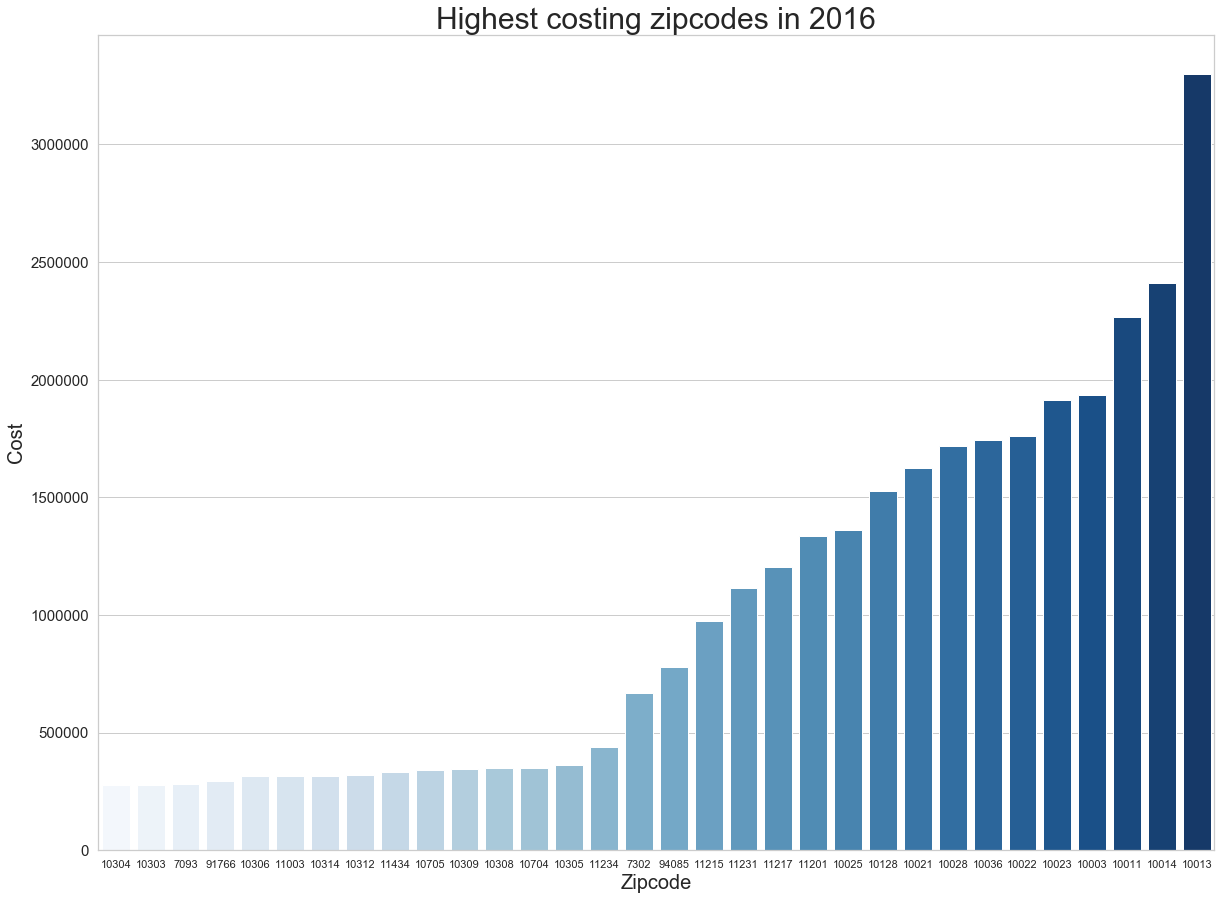

In [189]:
fig, ax = plt.subplots(figsize=(20,15))
zillow_df_2016=zillow_df_year[7:8]
zillow_df_2016=zillow_df_2016.T
zillow_df_2016=zillow_df_2016.reset_index().rename({ 7: "median_price"},axis=1)
df=zillow_df_2016.sort_values(by='median_price')

ax = sns.barplot(x='RegionName', y='median_price',palette='Blues', data=df,order=df['RegionName'])
ax.set(xlabel='RegionName', ylabel='median_price')

plt.title('Highest costing zipcodes in 2016',fontsize='30')
plt.xlabel('Zipcode', fontsize=20)
plt.ylabel('Cost', fontsize=20)



for tick in ax.axes.yaxis.get_major_ticks():
    tick.label.set_fontsize(15)

### From the above bargraphs, we see zipcodes between 10000-10100 have high costs associated with the while 100300s and 11000s tend to have lower costs. We shall determine which neighbourhoods these belong to in further sections

>### 12. Percentage change in cost by zipcodes in the last 2 years

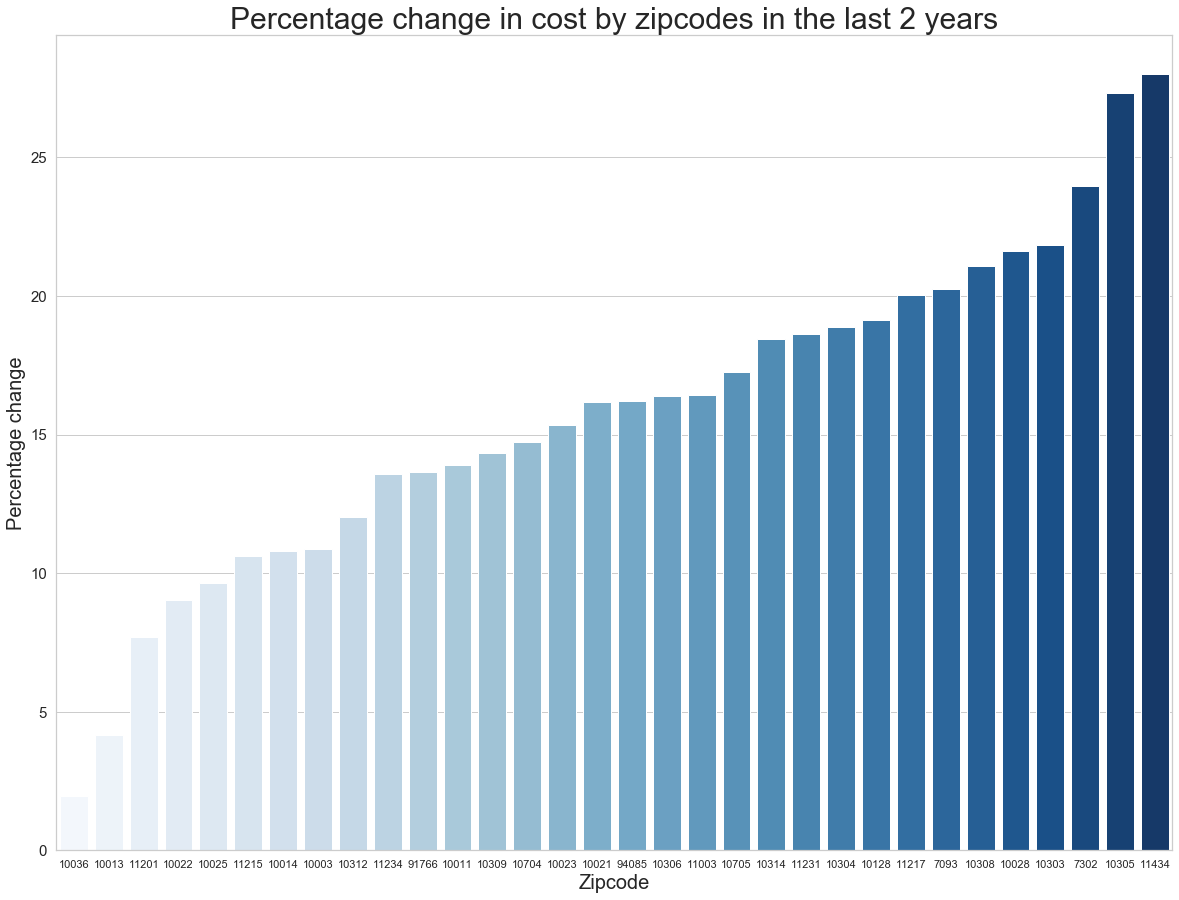

In [448]:
fig, ax = plt.subplots(figsize=(20,15))
df=zillow_df_T.set_index('date_year')

#Calculate percentage change for last 2 years
df=df.pct_change(periods=2)*100
df=df.iloc[8].sort_values(ascending=False).reset_index()
df.RegionName=df.RegionName.apply(str)
df=df.sort_values(by=2017,ascending=True).reset_index()

ax = sns.barplot(x='RegionName', y=2017, data=df,palette="Blues",order=df['RegionName'])
ax.set(xlabel='RegionName', ylabel='Percentage increase')
plt.title('Percentage change in cost by zipcodes in the last 2 years',fontsize='30')
plt.xlabel('Zipcode', fontsize=20)
plt.ylabel('Percentage change', fontsize=20)



for tick in ax.axes.yaxis.get_major_ticks():
    tick.label.set_fontsize(15)

>### 13. Percentage change in cost by zipcodes in the last 4 years

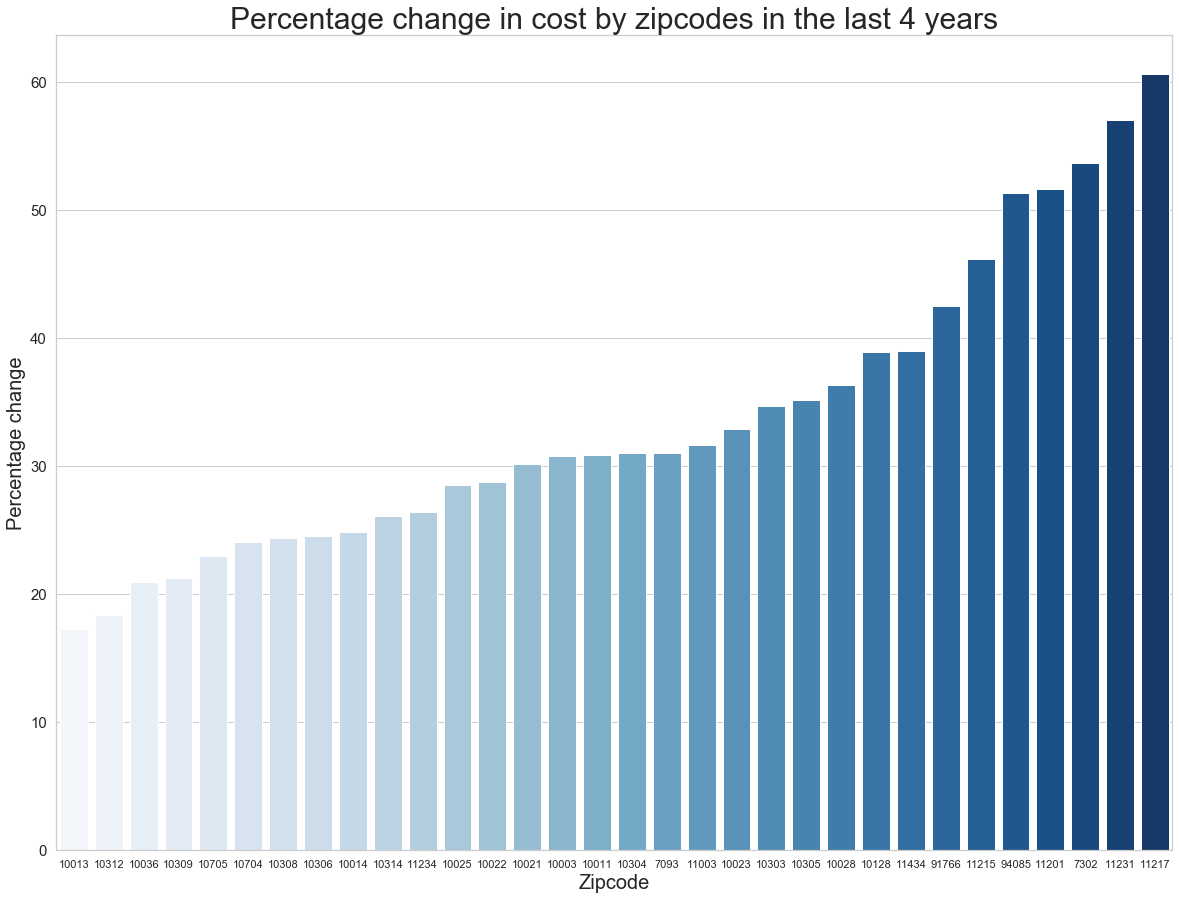

In [447]:
fig, ax = plt.subplots(figsize=(20,15))
df=zillow_df_T.set_index('date_year')
df=df.pct_change(periods=4)*100
df=df.iloc[8].sort_values(ascending=False).reset_index()

df.RegionName=df.RegionName.apply(str)
df=df.sort_values(by=2017,ascending=True).reset_index()
ax = sns.barplot(x='RegionName', y=2017, data=df,order=df['RegionName'],palette='Blues')

plt.title('Percentage change in cost by zipcodes in the last 4 years',fontsize='30')
plt.xlabel('Zipcode', fontsize=20)
plt.ylabel('Percentage change', fontsize=20)



for tick in ax.axes.yaxis.get_major_ticks():
    tick.label.set_fontsize(15)


### Not surprisingly, zipcodes with higher costs have lower percentage changes while zipcodes with lower costs have higher percentage changes.

> ### 14. Percentage change in cost by zipcodes in 2016-2017

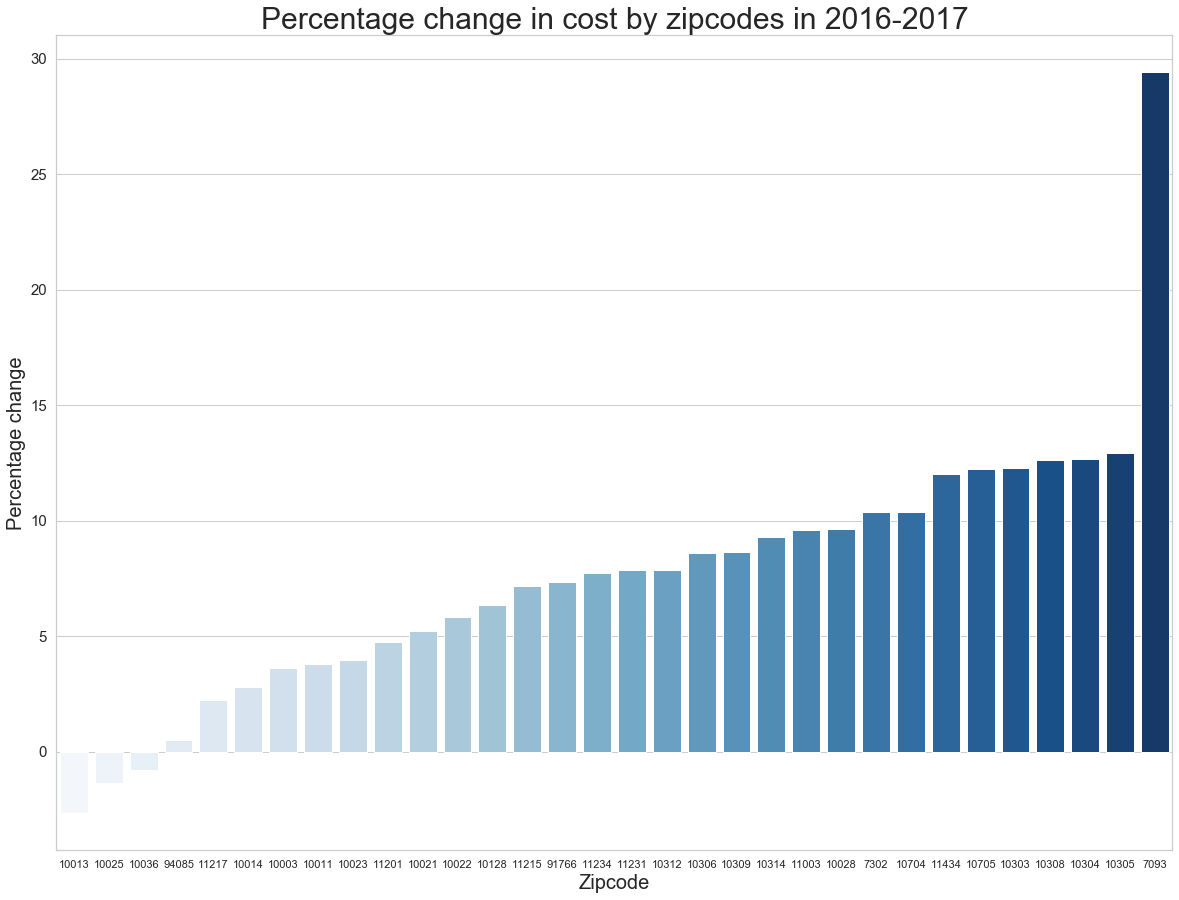

In [197]:
fig, ax = plt.subplots(figsize=(20,15))
df=zillow_df_T.set_index('date_year')
df=df.pct_change(periods=1)*100


df=df.iloc[8].sort_values(ascending=False).reset_index()
df.RegionName=df.RegionName.apply(str)
df=df.sort_values(by=2017,ascending=True).reset_index()

ax = sns.barplot(x='RegionName', y=2017,palette='Blues', data=df,order=df['RegionName'])
plt.title('Percentage change in cost by zipcodes in 2016-2017',fontsize='30')
plt.xlabel('Zipcode', fontsize=20)
plt.ylabel('Percentage change', fontsize=20)


for tick in ax.axes.yaxis.get_major_ticks():
    tick.label.set_fontsize(15)

### From Plot 9 , we saw some zipcodes with declining costs in 2016. As seen in the above plot, these zipcodes are 10013, 10025, 10036. If we see plot 10 and plot 11, these zipcodes are located on the right side of the plots which indicates these are associated with high costs. We shall consider this information while choosing zipcodes to purchase property in.

## Find Best Zipcodes

>### Median Price of two bedroom properties in each zipcode

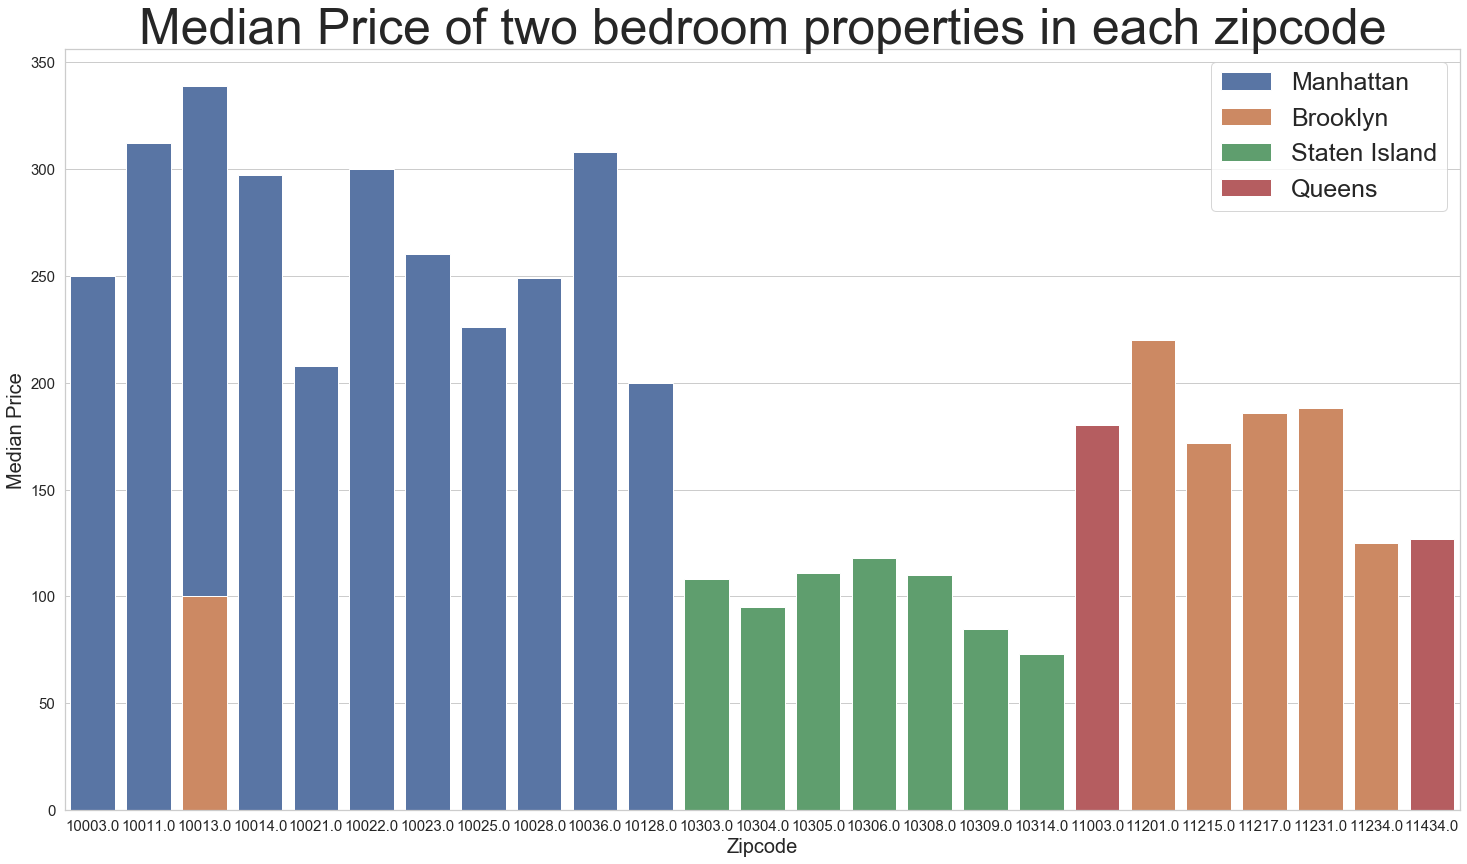

In [237]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [25, 14]
plt.rcParams['axes.labelsize'] = 30

#Remove $ sign in price column
airbnb_unique_df['price']=airbnb_unique_df['price'].replace('[\$,]', '', regex=True).astype(float)

#Obtain median price for each zipcode
df=airbnb_unique_df.groupby(['zipcode','neighbourhood_group_cleansed'])['price'].median().to_frame().reset_index()
df.price=df.price.round()

#Plot bargraph
sns.set(style="whitegrid")
ax = sns.barplot(x="zipcode", y="price", data=df,hue='neighbourhood_group_cleansed',dodge=False)
plt.xlabel('Zipcode', fontsize=20)
plt.ylabel('Median Price', fontsize=20)

ax.axes.set_title("Median Price of two bedroom properties in each zipcode",fontsize=50)
ax.legend(fontsize=25)
for tick in ax.axes.xaxis.get_major_ticks():
    tick.label.set_fontsize(15)

for tick in ax.axes.yaxis.get_major_ticks():
    tick.label.set_fontsize(15)

### As seen in plot 4, we know that Manhattan zipcodes tend to have a higher prices as compared to other neighbourhood groups. Staten Island attracts the leasse price among the four neighbourhood groups.

>### Obtain median cost of two bedroom properties

In [239]:
zillow_df_2017=zillow_df[8:].T.reset_index().rename({ 'index':'zipcode',8:'median_cost'},axis=1)[1:]

def get_median_price(each_row):
    zipcode=int(each_row)
    return(zillow_df_2017[zillow_df_2017.zipcode==str(zipcode)]['median_cost'].item())
     
airbnb_unique_df['median_cost']=airbnb_unique_df.zipcode.apply(get_median_price)

>### Median Cost of two bedroom properties in each zipcode

Note : Zipcode 10013 is present in both Manhattan and Brooklyn

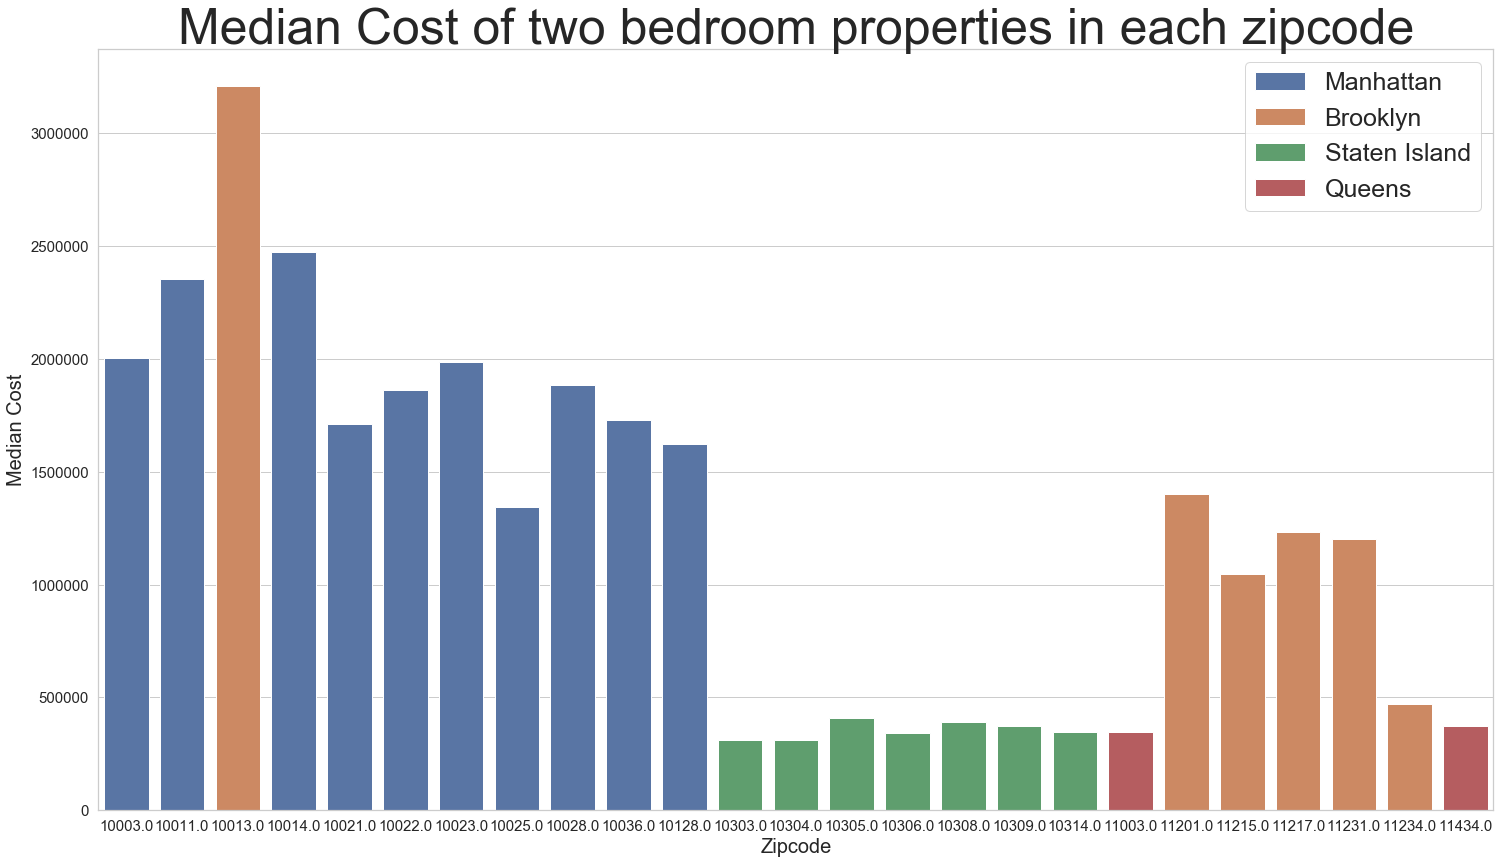

In [241]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [25, 14]

sns.set(style="whitegrid")
df=airbnb_unique_df.groupby(['zipcode','neighbourhood_group_cleansed'])['median_cost'].median().to_frame().reset_index()

ax = sns.barplot(x="zipcode", y="median_cost", data=df,hue='neighbourhood_group_cleansed',dodge=False)
ax.set(xlabel='Avg Cost', ylabel='neighbourhood_group_cleansed')
plt.xlabel('Zipcode', fontsize=20)
plt.ylabel('Median Cost', fontsize=20)

ax.axes.set_title("Median Cost of two bedroom properties in each zipcode",fontsize=50)
ax.legend(fontsize=25)
for tick in ax.axes.xaxis.get_major_ticks():
    tick.label.set_fontsize(15)

for tick in ax.axes.yaxis.get_major_ticks():
    tick.label.set_fontsize(15)
    

### As seen in the plot, the variation in costs in the Manhattan region exceed those in State Island and Queens.

>### Calculate price assuming 75% occupancy

In [244]:
airbnb_breakeven_df=airbnb_unique_df[['zipcode','neighbourhood_group_cleansed','price','median_cost']]
airbnb_75_occ_df=airbnb_breakeven_df.groupby(['zipcode','neighbourhood_group_cleansed'])['price'].median()
airbnb_75_occ_df=(airbnb_75_occ_df*.75).reset_index()
airbnb_zipcode_neighbourhood_df=airbnb_75_occ_df[['zipcode','neighbourhood_group_cleansed']]
airbnb_zipcode_neighbourhood_df.to_csv('airbnb_zipcode_neighbourhood_df.csv')

In [245]:
def get_price_75(each_zipcode):
    zipcode=int(each_zipcode)
    return(airbnb_75_occ_df[airbnb_75_occ_df.zipcode==(zipcode)]['price'].median())

#Dataframe with zipcode,neighbourhood,median_price,median_price_75,median_cost
airbnb_breakeven_df['price_75']=airbnb_breakeven_df.zipcode.apply(get_price_75)

## Calculate breakeven in number of years for each zipcode

>#### Assumptions made in calculating breakeven years:

>i.  all fixed costs remain the same for all listings for all years  
ii.  current price remains fixed   
iii. cost from 2017 used for calculating median cost

>#### Formula Used: 
> Revenue = ( Price*0.75 ) * 365  
> Breakeven Years = Median Cost / Revenue  


In [246]:
def find_breakeven_years(each_row):
    years=each_row.median_cost/each_row.price_75
    years=years/365
    return years

airbnb_breakeven_df['years']=airbnb_breakeven_df.apply(find_breakeven_years,axis=1)

>### Time taken to pay back cost in years

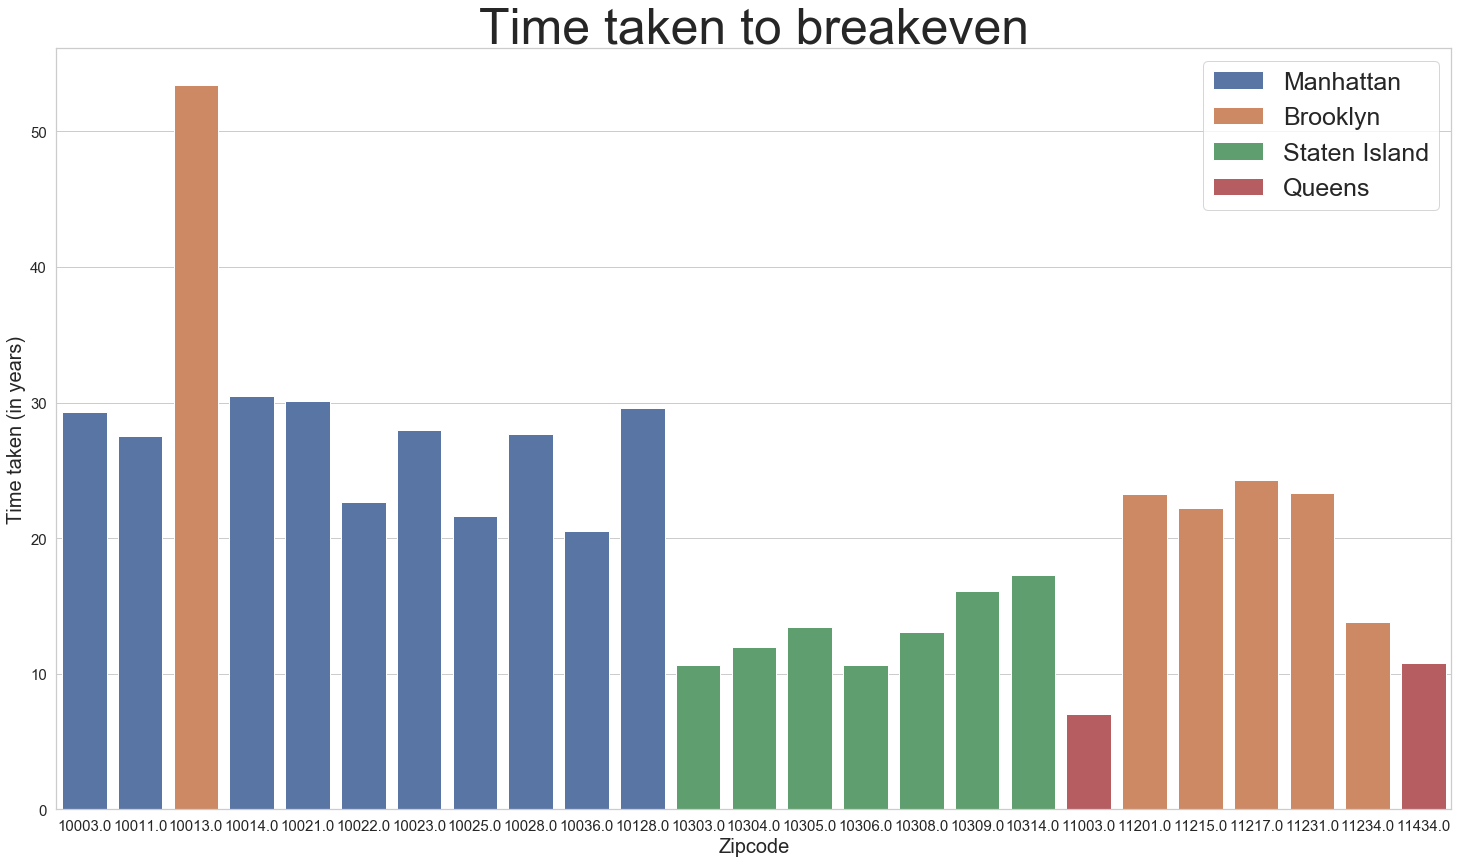

In [248]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [25, 14]


sns.set(style="whitegrid")
df=airbnb_breakeven_df.groupby(['zipcode','neighbourhood_group_cleansed'])['years'].median().to_frame().reset_index()

ax = sns.barplot(x="zipcode", y="years", data=df,hue='neighbourhood_group_cleansed',dodge=False)
plt.xlabel('Zipcode', fontsize=20)
plt.ylabel('Time taken (in years)', fontsize=20)

ax.axes.set_title("Time taken to breakeven",fontsize=50)
ax.legend(fontsize=25)
for tick in ax.axes.xaxis.get_major_ticks():
    tick.label.set_fontsize(15)

for tick in ax.axes.yaxis.get_major_ticks():
    tick.label.set_fontsize(15)

### We see that properties in Manahattan and Brooklyn take longer to breakeven irrespective of high median price. This is because of higher cost in investment. Staten Island and Queens take relatively lesser number of years to breakeven and start making profits thereafter.

>### Scatterplot of time taken to repay vs Median price 

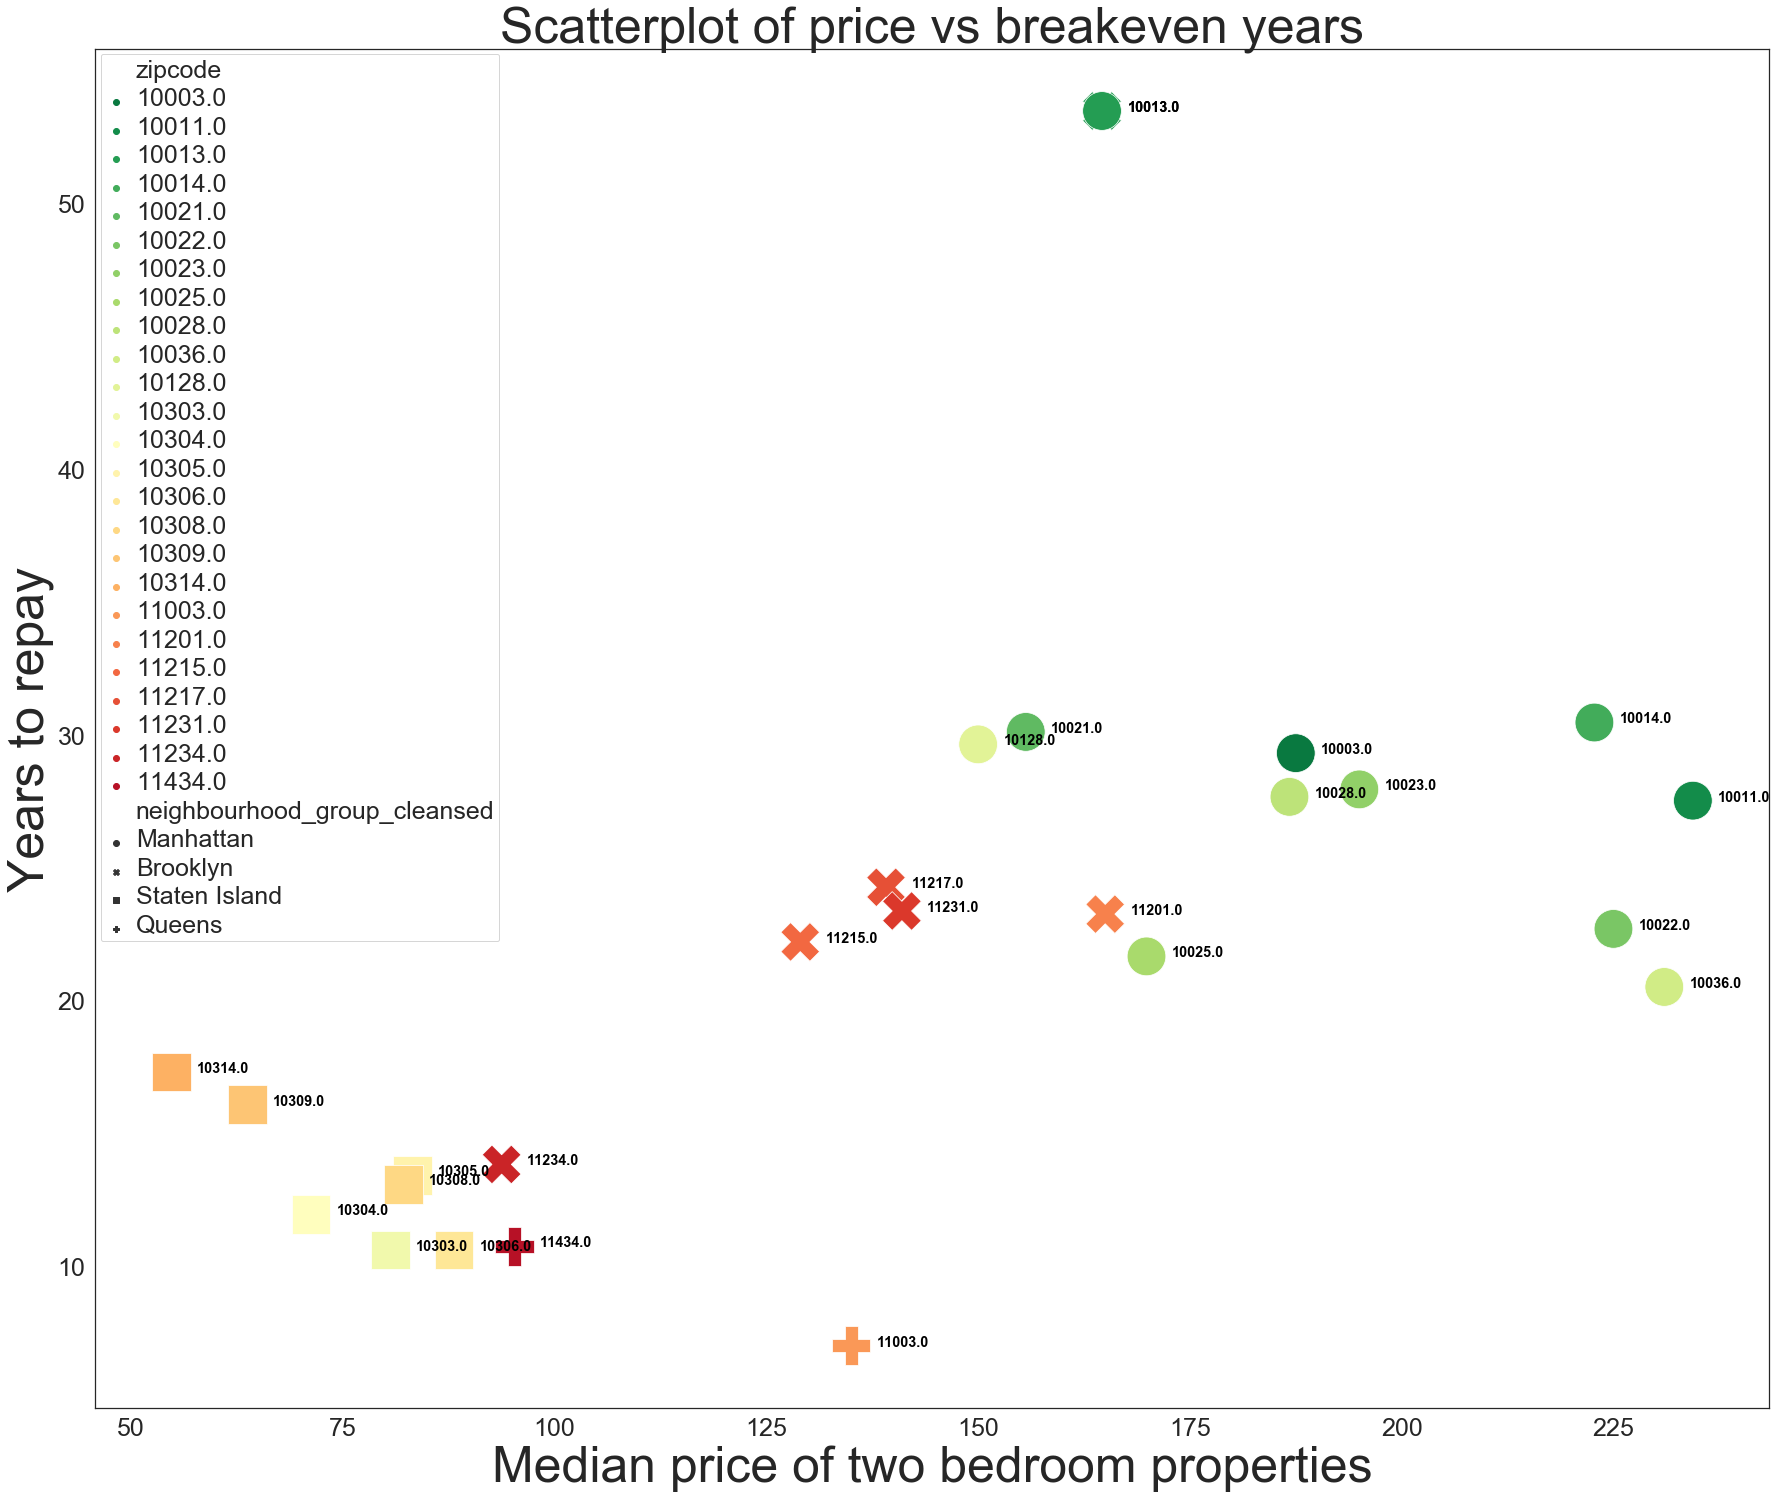

In [250]:
airbnb_breakeven_df=airbnb_breakeven_df.groupby(['zipcode','neighbourhood_group_cleansed','price_75'])['years'].median().to_frame().reset_index()

plt.rcParams['figure.figsize'] = [30, 25]
sns.set(style="white")
ax = sns.scatterplot(x="price_75", y="years", hue="zipcode", style='neighbourhood_group_cleansed', palette=sns.color_palette("RdYlGn_r", 25),s=1500,data=airbnb_breakeven_df)


plt.setp(ax.get_legend().get_texts(), fontsize='25') 
plt.setp(ax.get_legend().get_title(), fontsize='25')
for line in range(0,int(airbnb_breakeven_df.shape[0])):
     ax.text(airbnb_breakeven_df.price_75[line]+3, airbnb_breakeven_df.years[line], 
     airbnb_breakeven_df.zipcode[line], horizontalalignment='left', 
     size='large', color='black', weight='semibold')
plt.title('Scatterplot of price vs breakeven years',fontsize='50')
# Set x-axis label
plt.xlabel('Median price of two bedroom properties',fontsize='50')
# Set y-axis label
plt.ylabel('Years to repay',fontsize='50')
for tick in ax.axes.xaxis.get_major_ticks():
    tick.label.set_fontsize(25)

for tick in ax.axes.yaxis.get_major_ticks():
    tick.label.set_fontsize(25)       

### To determine which zipcodes to invest in, we draw a scatterplot of median price vs time taken to repay. Zipcodes having the least time taken to breakeven and the highest median price will be the most optimal zipcodes to invest in. The most ideal point would be the bottom right corner. Points that lie closest to this corner are picked as the best zipcodes to invest in with respect to having high price and low breakeven period.
   


Manhattan properties represented by 'O', have very high median price per night upwards of 130usd and most of the properties take between 22-32 years to breakeven. The best zipcodes to invest in are 10036, 10022, 10011,10014,10025 in that order. 

Brooklyn properties represented by the 'X', lie in the middle of the graph having a price range of 125usd to 175usd. These properties take 22-26 years to breakeven. We rule out investing in Brooklyn properties as there are some zipcodes in Manhattan than have the same breakeven period and much higher price. Hence the revenue obtained from Manhattan properties are more profitable than those in Brooklyn in the long run.

Propertes in Queens represented by '+', take less than 10 years to breakeven. Though these points have less prices associated with them, they are higher than the per night prices of properties in Staten Island. The best zipcode is 11003 which has a high median price of 130usd and takes less than 5 years to repay. The breakeven period is the least among all the zipodes and the median price obtained is comparable to properties in Brookyln which is a good point to note. 

Properties in Staten Island represented by [] do not generate much revenue and take between 10-20 years to breakeven. These zipcodes have the least risk associated with them since these have less cost to invest. However, properties in this zipcode take a long time to breakeven considering the lower investment associated with them. Best zipcodes to invest are 10306, 10303, 10308, 10305.



>### To help understand the graph better, we shall calculate scores for each zipcode. 
score = (price)/(breakeven period) 

>### We need to determine zipcodes with higher price and low breakeven periods. Hence, high scores represent better zipcodes to invest in. We shall see which zipcodes have the highest scores.

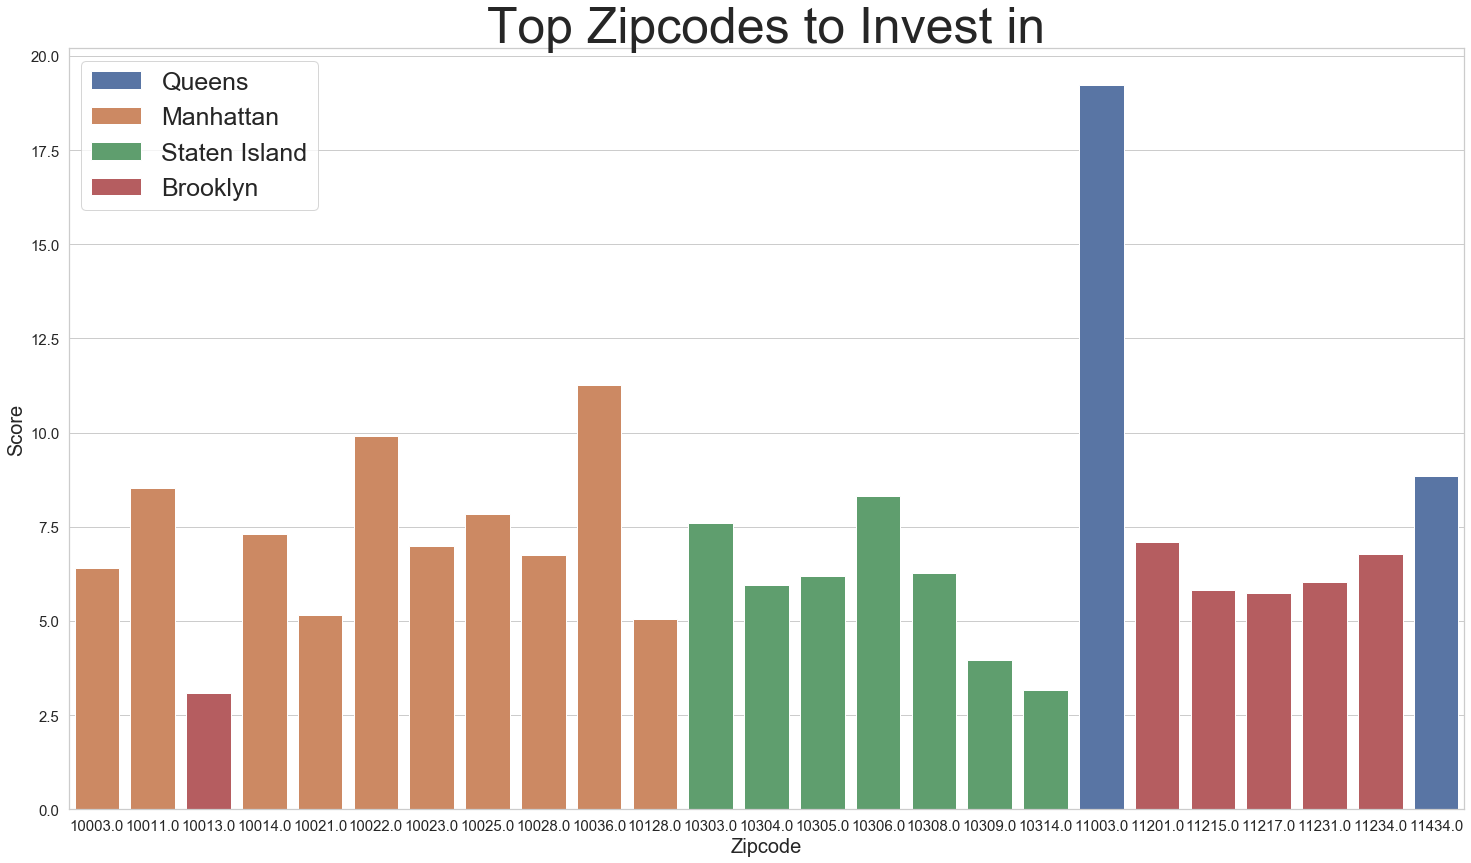

In [473]:
airbnb_breakeven_df['score']=airbnb_breakeven_df['price_75']/airbnb_breakeven_df['years']

%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [25, 14]


sns.set(style="whitegrid")
df=airbnb_breakeven_df.groupby(['neighbourhood_group_cleansed','zipcode'])['score'].sum().reset_index().sort_values(by='score',ascending=False)

ax = sns.barplot(x="zipcode", y="score", data=df,hue='neighbourhood_group_cleansed',dodge=False)
plt.xlabel('Zipcode', fontsize=20)
plt.ylabel('Score', fontsize=20)

ax.axes.set_title("Top Zipcodes to Invest in",fontsize=50)
ax.legend(fontsize=25)
for tick in ax.axes.xaxis.get_major_ticks():
    tick.label.set_fontsize(15)

for tick in ax.axes.yaxis.get_major_ticks():
    tick.label.set_fontsize(15)



### Top 10 zipcodes to invest in

In [481]:
airbnb_score_df=airbnb_breakeven_df.groupby(['neighbourhood_group_cleansed','zipcode'])['score'].sum().reset_index().sort_values(by='score',ascending=False)[:10].T
airbnb_score_df

,17,15,11,18,7,22,13,19,9,1
neighbourhood_group_cleansed,Queens,Manhattan,Manhattan,Queens,Manhattan,Staten Island,Manhattan,Staten Island,Manhattan,Brooklyn
zipcode,11003,10036,10022,11434,10011,10306,10025,10303,10014,11201
score,19.2425,11.2638,9.91502,8.85542,8.51744,8.30651,7.84347,7.59367,7.31364,7.09693


## Results

### From the above plot and table, we recommend zipcodes 11003 (Queens) and 10036 (Manhattan) as the most ideal zipcodes to invest. 

> ### ZIPCODE 11003 
We see that properties in this zipcode in Queens has a relatively high score of 19.25. From the above 'median price by zipcode' and 'median cost by zipcode' plots, we see that zipcode 11003 has a low cost to purchase and a high price per night associated with it. We have also mentioned earlier that Queens has a lot of potential due to less competition and less number of listings. The risk associated with properties in this zipcode is less since it takes less than 10 years to breakeven. However, we need to confirm if the assumption of all year occupancy rate of 75% holds good. We shall need to analyze if bookings in this area are high. If they are atleast 75%, this would be the most ideal zipcode to invest in. Also, if the investor has less capital to invest in, this zipcode will be highly desirable

> ### ZIPCODE 10036 
We see that properties in this zipcode in Manhattan have high price and high cost associated with it. We have mentioned earlier that Manhattan properties are the most popular in terms of number of listings and bookings. This zipcode also has the highest median price per night associated with it. However, the initial cost of investment is higher than other neighbourhoods but is relatively in the lower end of the spectrum of Manhatten zipcodes. We have also mentioned that the cost of properties in zipcode 10036 has decreased in 2017 from 2016. This is hence an ideal time to invest since this is an anomaly as the general trend suggests an increase in purchase costs. We must capitalize on the lower cost of purchase as compared to the previous year and invest in this zipcode provided we have a high capital. 

## Next Steps

> ### Occupancy Rate 
We have assumed an occupancy rate of 75%. We shall need to determine the median occupancy rate of each zipcode by analyzing bookings data. By analyzing this data and plugging the occupancy rate into the breakeven formula, we can suggest a more accurate recommendation.

> ### Cost of Property
We are calculating this based on the cost of property in 2017. We need access to cost of properties in 2019 and run through the analysis again to observe if our observation holds true.

>### Type of property
Our recommendation is based on the median price of properties irrespective of room-type. We see a massive difference in median price between room-types. We shall need to execute this analysis again by recommending zipcodes for each room-type 

> ### Brand Value
Determine if the investors are looking for marketing and branding advantages. Since Manhattan and Brooklyn are  popular and busy, even if they pose a higher risk and higher capital investment, having an airbnb in these areas might increase the brand value of the investor. With this knowledge, it will help us make a better call in recommending best zipcodes to invest in.

> ### Square Feet
The data had 99% missing values in the square feet column. From the correlation plot, we determined that the square feet feature has a huge influence of price. If we can obtain data regarding sq.feet values of all two bedroom listings, we can bin sq.footage into categories and recommend more zipcodes for each bin.